# 🚗 Car Price Prediction
- **Voting Regressor**
- **Extra Trees**
- **XGBoost**
- **LightGBM**
- **Gradient Boosting**
- **MLP**
- **SVR**
- **Ridge Regression**
- **Elastic Net**
- **Lasso Regression**
- **Deep Neural Network**
- **Linear Regression**
- **Random Forest**


## 1. Kütüphanelerin içe aktarılması

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning kütüphaneleri
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import joblib

# Gradient Boosting kütüphaneleri
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning kütüphaneleriİ
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
sns.set()

## 2. Veri setinin yüklenmesi

In [2]:
car_raw = pd.read_csv('Car_Raw_Data.csv')
car_raw.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

### 2.1 Ham veriyi ön işleme

In [3]:
car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
car_raw.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

## 🔧 3. Veri Ön İşleme (Data Preprocessing)
### 3.1 Veri Setinin Genel Bilgileri

In [5]:
car_raw.drop("Model", axis=1, inplace=True)
car_raw.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

Ham verideki eksik değerlerin toplamı 

In [6]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

engine ve price sütunlarında na değerler var

In [7]:
car_raw.dropna(inplace=True)
car_raw.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### 3.2 Eksik Değerlerin Tespit Edilmesi ve Temizlenmesi

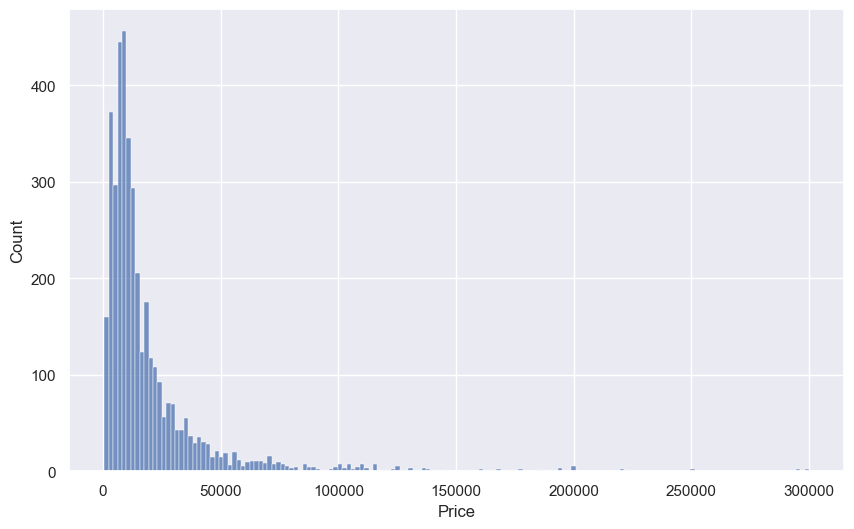

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(car_raw['Price'])
plt.show()

In [9]:
q = car_raw['Price'].quantile(0.99)
q

129812.51999999981

## 📊 4. Keşifsel Veri Analizi (Exploratory Data Analysis)
### 4.1 Fiyat Dağılımının İncelenmesi

In [10]:
car_1 = car_raw[car_raw['Price'] < q]
car_1.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

Text(0.5, 1.0, 'Aykırı değerler dahil edildiğinde')

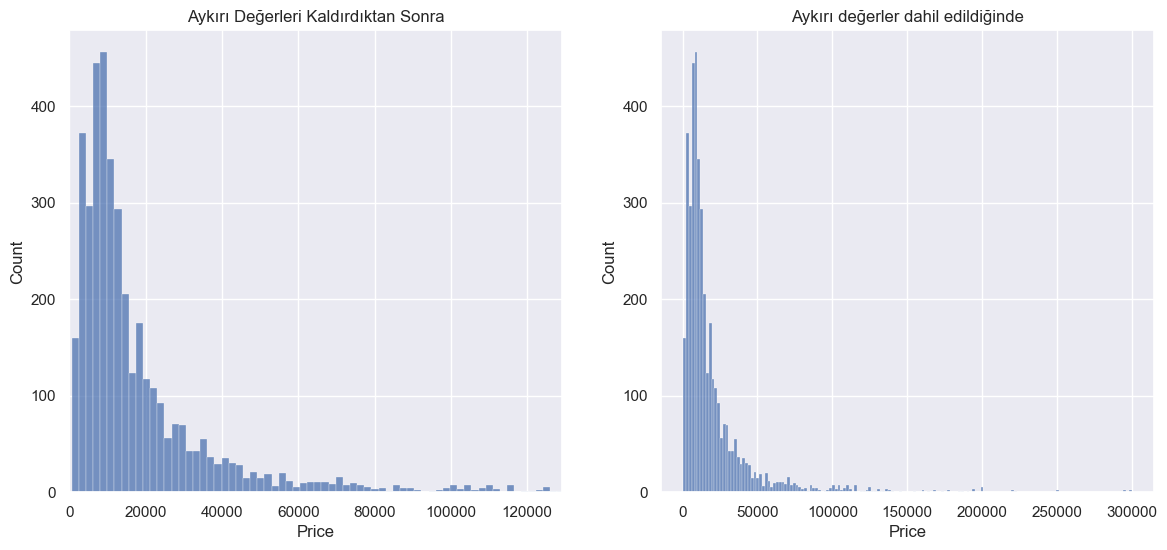

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(car_raw['Price']) 
plt.title('Aykırı Değerleri Kaldırdıktan Sonra') 
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.histplot(car_raw['Price']) 
plt.title('Aykırı değerler dahil edildiğinde') 

### 4.2 Aykırı Değerlerin Analizi

In [14]:
q = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage'] < q]
q

435.5100000000002

<Axes: xlabel='Year', ylabel='Count'>

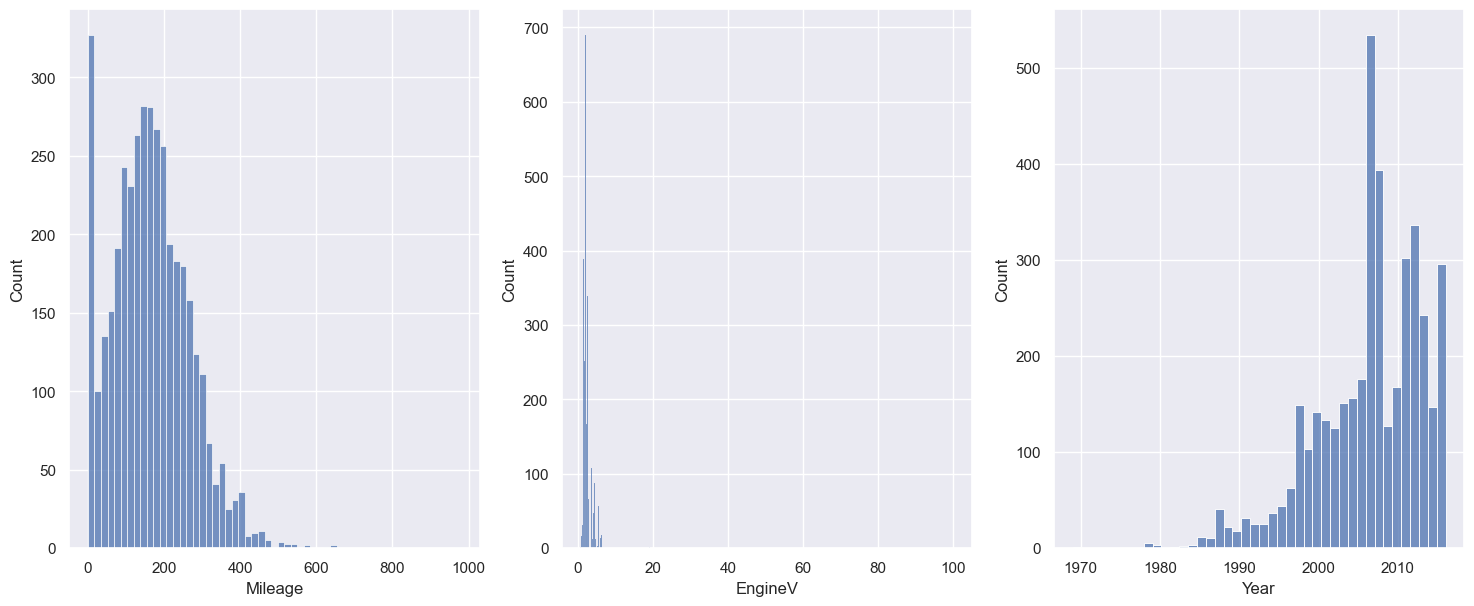

In [13]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage']) 

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.histplot(car_raw['Year']) 

In [15]:
q = car_1["Mileage"].quantile(0.99)
car_2 = car_1[car_1["Mileage"] < q]

### 4.3 Diğer Değişkenler İçin Aykırı Değer Analizi

milage

Text(0.5, 1.0, 'Aykırı Değerleri Kaldırdıktan Sonra')

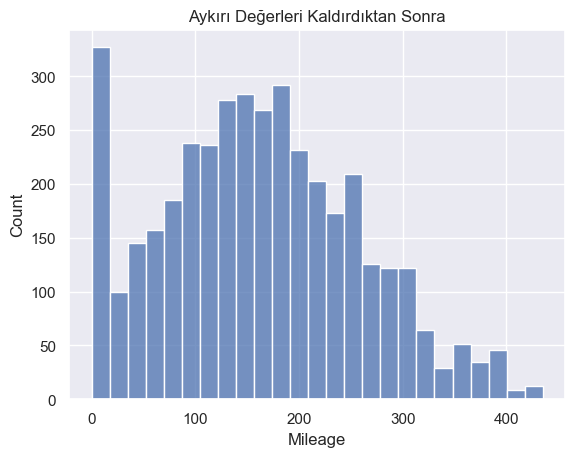

In [16]:
sns.histplot(car_2['Mileage']) 
plt.title('Aykırı Değerleri Kaldırdıktan Sonra') 

Motor Hacmi

Text(0.5, 1.0, 'Car Engine Volume')

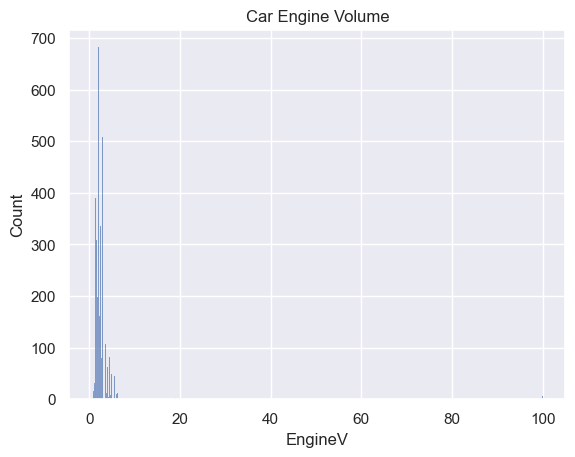

In [18]:
sns.histplot(car_2['EngineV']) 
plt.title('Car Engine Volume') 

In [19]:
q = car_2["EngineV"].quantile(0.99)
q

6.0

Text(0.5, 1.0, 'Mantıklı aralıkta motor hacim değerleri')

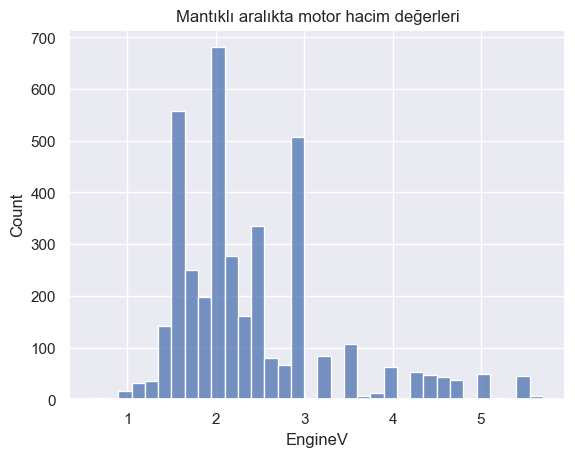

In [20]:
car_3 = car_2[car_2['EngineV']<6]
sns.histplot(car_3['EngineV'])
plt.title('Mantıklı aralıkta motor hacim değerleri')

Yıl

Text(0.5, 1.0, 'Yıl')

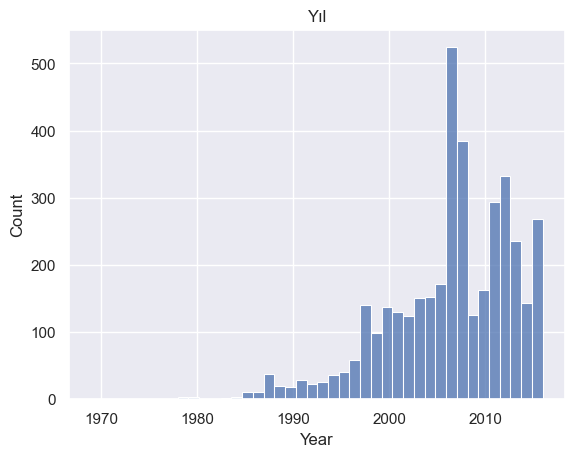

In [21]:
sns.histplot(car_3['Year']) 
plt.title('Yıl') 

In [22]:
q = car_3['Year'].quantile(0.01)
car_4 = car_3[car_3['Year']>q]
q

1987.0

Text(0.5, 1.0, 'Eski yılları sildikten sonra Yıl Değerleri')

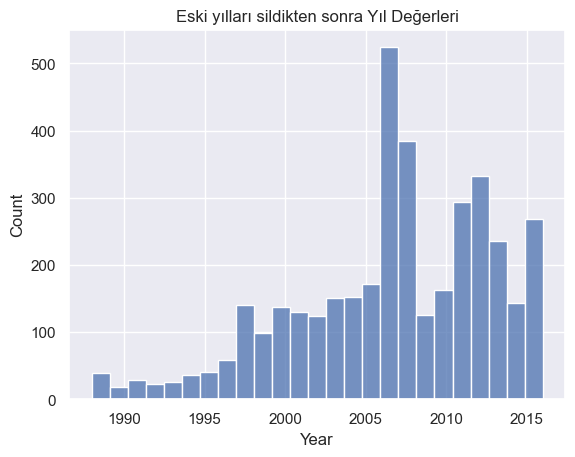

In [23]:
sns.histplot(car_4['Year'])
plt.title('Eski yılları sildikten sonra Yıl Değerleri')

In [24]:
car_4

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4338     Volkswagen   11500.0        van      163      2.5      Diesel   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4338          yes  2008  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4344          yes  2013  

[3840 rows x 8 columns]

In [26]:
# index düzeltme
car_clean = car_4.reset_index(drop=True)

car_clean

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3835     Volkswagen   11500.0        van      163      2.5      Diesel   
3836         Toyota   17900.0      sedan       35      1.6      Petrol   
3837  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3838            BMW    6500.0      sedan        1      3.5      Petrol   
3839     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
3835          yes  2008  
3836          yes  2014  
3837          yes  2014  
3838          yes  1999  
3839          yes  2013  

[3840 rows x 8 columns]

In [27]:
car_clean.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3840    3840.000000   3840  3840.000000  3840.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1451          NaN          NaN   
mean           NaN   18028.973987    NaN   160.860156     2.424310   
std            NaN   18963.887320    NaN    95.742943     0.899824   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    92.000000     1.800000   
50%            NaN   11525.000000    NaN   157.500000     2.200000   
75%            NaN   21500.000000    NaN   226.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     5.700000   

       Engine Type Registration         Year  
count         3840         3840  3840.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1806         3478          NaN  
mean           NaN          NaN  2006.702865  
std            NaN          NaN     6.117627  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

In [28]:
car_raw.shape[0] -  car_clean.shape[0]

185

Total kayıp
- 172+185 = 357

In [29]:
car_clean.to_csv('Car_cleaned.csv', index=False)

In [30]:
car = pd.read_csv('Car_cleaned.csv')
car.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  
0          yes  1991  
1          yes  1999  
2          yes  2003  
3          yes  2007  
4          yes  2011

lineer regresyon ile 2 değişken arasında doğrusal ilişki var mı kontrolü

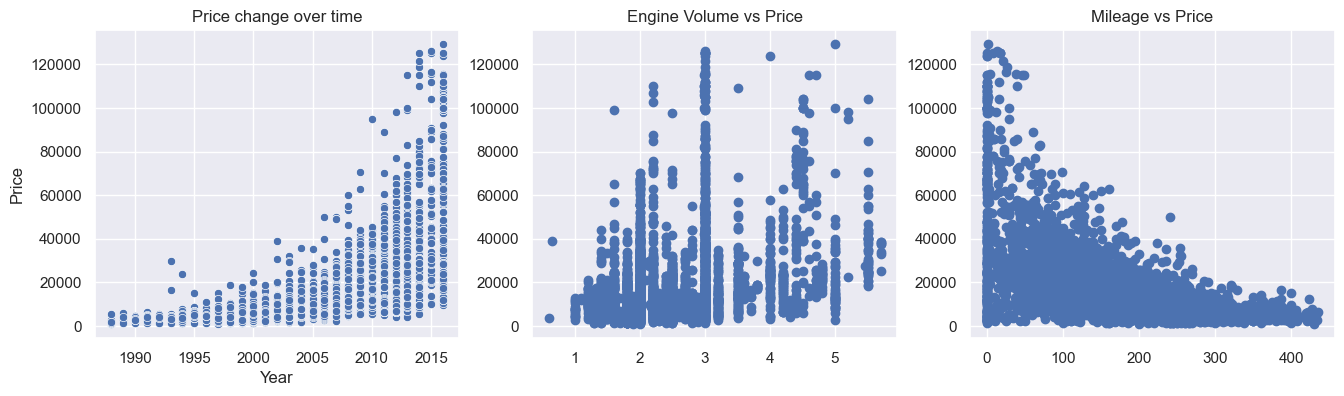

In [31]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=car["Year"], y=car["Price"])
plt.title("Price change over time")
plt.subplot(1,3,2)
plt.scatter(x=car["EngineV"], y=car["Price"])
plt.title("Engine Volume vs Price")
plt.subplot(1,3,3)
plt.scatter(x=car["Mileage"], y=car["Price"])
plt.title("Mileage vs Price")
plt.show()

doğrusal ilişki yok

Text(0.5, 1.0, 'Price')

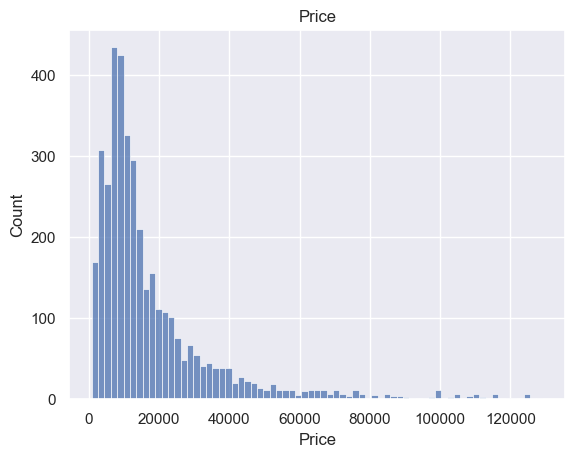

In [32]:
sns.histplot(car['Price'])
plt.title('Price')

Sahip olduğumuz fiyat verisi doğrusal değil.

Veriyi dönüştürmek için log dönüşümü deniyoruz

In [33]:
log_price = np.log(car['Price'])
car['log_price'] = log_price

car.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  log_price  
0          yes  1991   8.342840  
1          yes  1999   8.974618  
2          yes  2003   9.495519  
3          yes  2007  10.043249  
4          yes  2011   9.814656

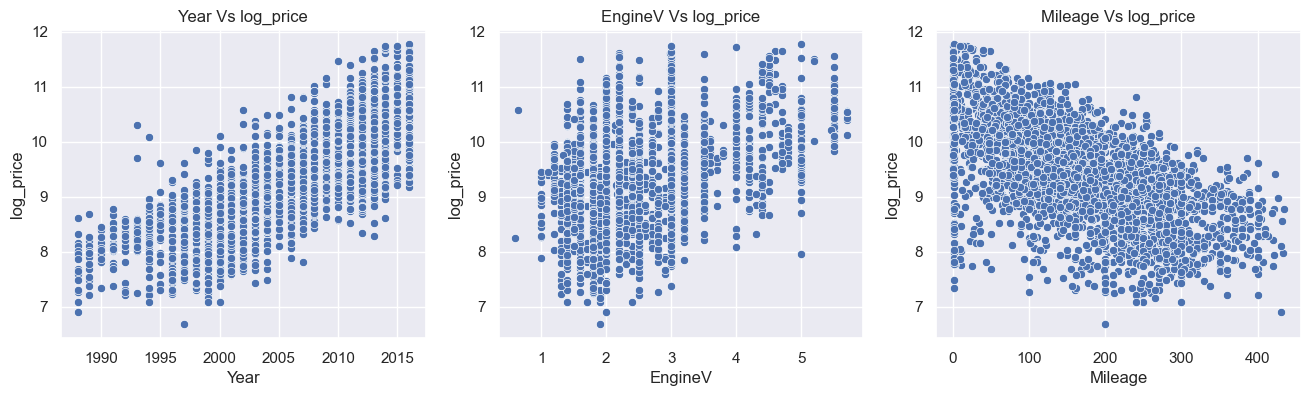

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']) 
plt.title('Year Vs log_price') 

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']) 
plt.title('EngineV Vs log_price') 

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']) 
plt.title('Mileage Vs log_price') 

Log dönüşümü ardından doğrusallık gözlemlendi

orijinal fiyat tablosuna ihtiyacımız kalmadığı için kaldırabiliriz.

In [35]:
car.drop('Price', axis=1, inplace=True)

çoklu doğrusallık var mı?

In [36]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Burada, arabanın daha yeni olması kilometre değerinin daha düşük olacağı gibi varsayılabilecek verilerde bazı çoklu doğrusallık olabilir. bu nedenle Yıl ve Kilometre birbiriyle ilişkili olacaktır

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

var = car[['Mileage','Year', 'EngineV']]
vif_df = pd.DataFrame()

vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['Features'] = var.columns
vif_df

VIF Features
0   3.798257  Mileage
1  10.823028     Year
2   8.262153  EngineV

- **VIF = 1**: Çoklu bağlantı yok (minimum değer)
- **1 < VIF < 5**: Kabul edilebilir
- **VIF > 5**: Çoklu bağlantı sorunu

In [38]:
car.drop('Year', axis=1, inplace=True)
car.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   

   log_price  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656

In [39]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3840 non-null   object 
 1   Body          3840 non-null   object 
 2   Mileage       3840 non-null   int64  
 3   EngineV       3840 non-null   float64
 4   Engine Type   3840 non-null   object 
 5   Registration  3840 non-null   object 
 6   log_price     3840 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 210.1+ KB


In [40]:
car_dum = pd.get_dummies(car, drop_first=True)
car_dum = car_dum.astype(float)
car_dum

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0       277.0      2.0   8.342840        1.0                  0.0   
1       427.0      2.9   8.974618        0.0                  1.0   
2       358.0      5.0   9.495519        0.0                  1.0   
3       240.0      4.2  10.043249        0.0                  0.0   
4       120.0      2.0   9.814656        0.0                  0.0   
...       ...      ...        ...        ...                  ...   
3835    163.0      2.5   9.350102        0.0                  0.0   
3836     35.0      1.6   9.792556        0.0                  0.0   
3837      9.0      3.0  11.736069        0.0                  1.0   
3838      1.0      3.5   8.779557        1.0                  0.0   
3839    124.0      2.0   9.510445        0.0                  0.0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                  0.0            0.0           0.0               0.0   
1                  0.0            0.0           0.0               0.0   
2                  0.0            0.0           0.0               0.0   
3                  0.0            0.0           0.0               0.0   
4                  0.0            0.0           1.0               0.0   
...                ...            ...           ...               ...   
3835               0.0            0.0           0.0               1.0   
3836               0.0            0.0           1.0               0.0   
3837               0.0            0.0           0.0               0.0   
3838               0.0            0.0           0.0               0.0   
3839               0.0            0.0           0.0               1.0   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0            0.0         0.0         1.0         0.0       0.0   
1            0.0         0.0         0.0         0.0       1.0   
2            0.0         0.0         1.0         0.0       0.0   
3            0.0         0.0         0.0         0.0       0.0   
4            0.0         0.0         0.0         0.0       0.0   
...          ...         ...         ...         ...       ...   
3835         0.0         0.0         0.0         0.0       1.0   
3836         0.0         0.0         1.0         0.0       0.0   
3837         0.0         0.0         1.0         0.0       0.0   
3838         0.0         0.0         1.0         0.0       0.0   
3839         0.0         0.0         0.0         0.0       1.0   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                 0.0                0.0                 1.0               1.0  
1                 0.0                0.0                 0.0               1.0  
2                 1.0                0.0                 0.0               1.0  
3                 0.0                0.0                 1.0               1.0  
4                 0.0                0.0                 1.0               1.0  
...               ...                ...                 ...               ...  
3835              0.0                0.0                 0.0               1.0  
3836              0.0                0.0                 1.0               1.0  
3837              0.0                0.0                 0.0               1.0  
3838              0.0                0.0                 1.0               1.0  
3839              0.0                0.0                 0.0               1.0  

[3840 rows x 18 columns]

In [41]:
vif_df_all = pd.DataFrame()

vif_df_all['VIF'] = [vif(car_dum.values, i) for i in range(car_dum.shape[1])]
vif_df_all['Features'] = car_dum.columns

vif_df_all

VIF             Features
0    4.552054              Mileage
1   14.852786              EngineV
2   43.679678            log_price
3    2.624505            Brand_BMW
4    3.053677  Brand_Mercedes-Benz
5    1.837404     Brand_Mitsubishi
6    2.295639        Brand_Renault
7    2.426677         Brand_Toyota
8    3.336827     Brand_Volkswagen
9    1.601709           Body_hatch
10   1.599282           Body_other
11   3.485867           Body_sedan
12   1.828059           Body_vagon
13   2.606594             Body_van
14   1.714373      Engine Type_Gas
15   1.081106    Engine Type_Other
16   2.472054   Engine Type_Petrol
17  15.079282     Registration_yes

43.679678 =	log_price

fiyat diğer sütünlarla yüksek oranda ilişkili

In [42]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [43]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

car_pos = car_dum[col]
car_pos


log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0      8.342840    277.0      2.0        1.0                  0.0   
1      8.974618    427.0      2.9        0.0                  1.0   
2      9.495519    358.0      5.0        0.0                  1.0   
3     10.043249    240.0      4.2        0.0                  0.0   
4      9.814656    120.0      2.0        0.0                  0.0   
...         ...      ...      ...        ...                  ...   
3835   9.350102    163.0      2.5        0.0                  0.0   
3836   9.792556     35.0      1.6        0.0                  0.0   
3837  11.736069      9.0      3.0        0.0                  1.0   
3838   8.779557      1.0      3.5        1.0                  0.0   
3839   9.510445    124.0      2.0        0.0                  0.0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                  0.0            0.0           0.0               0.0   
1                  0.0            0.0           0.0               0.0   
2                  0.0            0.0           0.0               0.0   
3                  0.0            0.0           0.0               0.0   
4                  0.0            0.0           1.0               0.0   
...                ...            ...           ...               ...   
3835               0.0            0.0           0.0               1.0   
3836               0.0            0.0           1.0               0.0   
3837               0.0            0.0           0.0               0.0   
3838               0.0            0.0           0.0               0.0   
3839               0.0            0.0           0.0               1.0   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0            0.0         0.0         1.0         0.0       0.0   
1            0.0         0.0         0.0         0.0       1.0   
2            0.0         0.0         1.0         0.0       0.0   
3            0.0         0.0         0.0         0.0       0.0   
4            0.0         0.0         0.0         0.0       0.0   
...          ...         ...         ...         ...       ...   
3835         0.0         0.0         0.0         0.0       1.0   
3836         0.0         0.0         1.0         0.0       0.0   
3837         0.0         0.0         1.0         0.0       0.0   
3838         0.0         0.0         1.0         0.0       0.0   
3839         0.0         0.0         0.0         0.0       1.0   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                 0.0                0.0                 1.0               1.0  
1                 0.0                0.0                 0.0               1.0  
2                 1.0                0.0                 0.0               1.0  
3                 0.0                0.0                 1.0               1.0  
4                 0.0                0.0                 1.0               1.0  
...               ...                ...                 ...               ...  
3835              0.0                0.0                 0.0               1.0  
3836              0.0                0.0                 1.0               1.0  
3837              0.0                0.0                 0.0               1.0  
3838              0.0                0.0                 1.0               1.0  
3839              0.0                0.0                 0.0               1.0  

[3840 rows x 18 columns]

In [46]:
car_pos.to_csv('processedData\Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


In [51]:
car = pd.read_csv('processedData\Car_preproccesed.csv')
car.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840    277.0      2.0        1.0                  0.0   
1   8.974618    427.0      2.9        0.0                  1.0   
2   9.495519    358.0      5.0        0.0                  1.0   
3  10.043249    240.0      4.2        0.0                  0.0   
4   9.814656    120.0      2.0        0.0                  0.0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0               0.0            0.0           0.0               0.0   
1               0.0            0.0           0.0               0.0   
2               0.0            0.0           0.0               0.0   
3               0.0            0.0           0.0               0.0   
4               0.0            0.0           1.0               0.0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0         0.0         0.0         1.0         0.0       0.0              0.0   
1         0.0         0.0         0.0         0.0       1.0              0.0   
2         0.0         0.0         1.0         0.0       0.0              1.0   
3         0.0         0.0         0.0         0.0       0.0              0.0   
4         0.0         0.0         0.0         0.0       0.0              0.0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                0.0                 1.0               1.0  
1                0.0                 0.0               1.0  
2                0.0                 0.0               1.0  
3                0.0                 1.0               1.0  
4                0.0                 1.0               1.0

## 5. Modeller
### 5.1 Lineer Regresyon

In [87]:
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3840, 17), (3840,))

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.21319614, -0.47160927,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [ 2.78009529,  0.52871702, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [ 2.05932168,  2.86281171, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       ...,
       [-1.58633032,  0.63986439, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867],
       [-1.66989828,  1.19560122,  2.27456225, ..., -0.16183079,
         1.34425353,  0.32261867],
       [-0.38504098, -0.47160927, -0.43964503, ..., -0.16183079,
        -0.74390729,  0.32261867]])

In [89]:
X_scaled[0]

array([ 1.21319614, -0.47160927,  2.27456225, -0.48653363, -0.29216256,
       -0.3560345 , -0.38602146, -0.53237436, -0.26557951, -0.32311042,
        1.28314096, -0.32751555, -0.43457392, -0.41664629, -0.16183079,
        1.34425353,  0.32261867])

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3072, 17), (3072,), (768, 17), (768,))

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

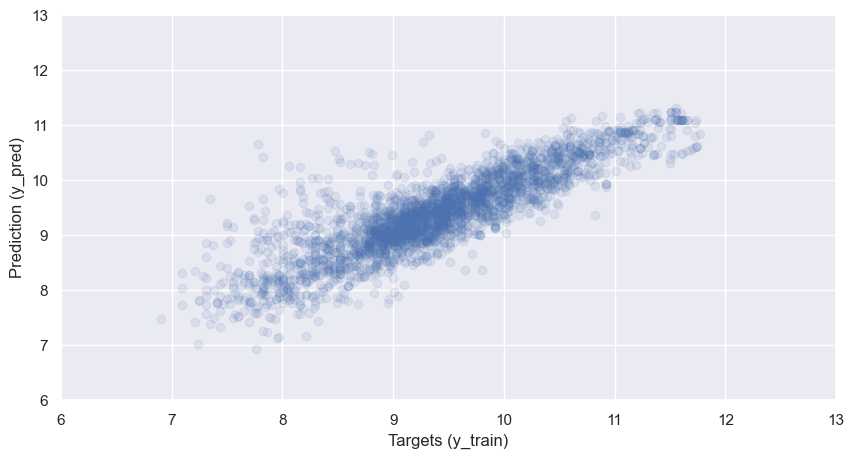

In [92]:
# Temel Lineer regresyon modelininin değerlendirmesi
y_pred_train = lr.predict(X_train)
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

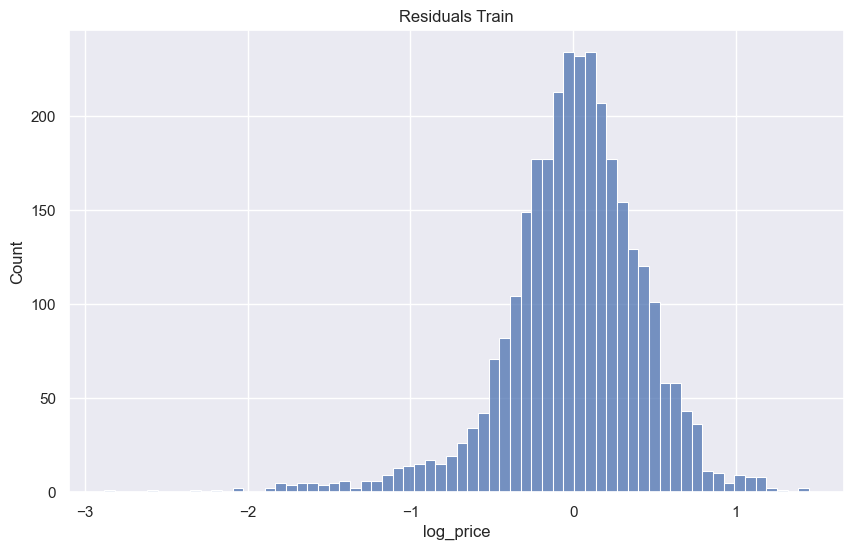

In [93]:
residuals_train = (y_train - y_pred_train)

plt.figure(figsize=(10,6))
sns.histplot(residuals_train)
plt.title('Residuals Train')
plt.show()

In [94]:
r2_score(y_train, y_pred_train)

0.7471422382886646

In [95]:
np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

10198.614311788097

In [96]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

Features   Weights
0               Mileage -0.449230
1               EngineV  0.205828
2             Brand_BMW  0.020003
3   Brand_Mercedes-Benz  0.017361
4      Brand_Mitsubishi -0.138177
5         Brand_Renault -0.178086
6          Brand_Toyota -0.056287
7      Brand_Volkswagen -0.088772
8            Body_hatch -0.150938
9            Body_other -0.101199
10           Body_sedan -0.203289
11           Body_vagon -0.123849
12             Body_van -0.160866
13      Engine Type_Gas -0.122254
14    Engine Type_Other -0.025743
15   Engine Type_Petrol -0.140599
16     Registration_yes  0.317344

Text(0, 0.5, 'Prediction (y_pred)')

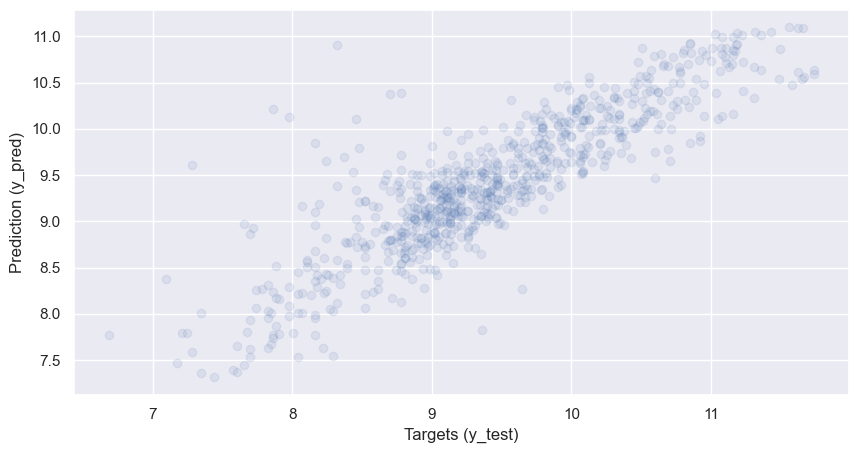

In [97]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred)')

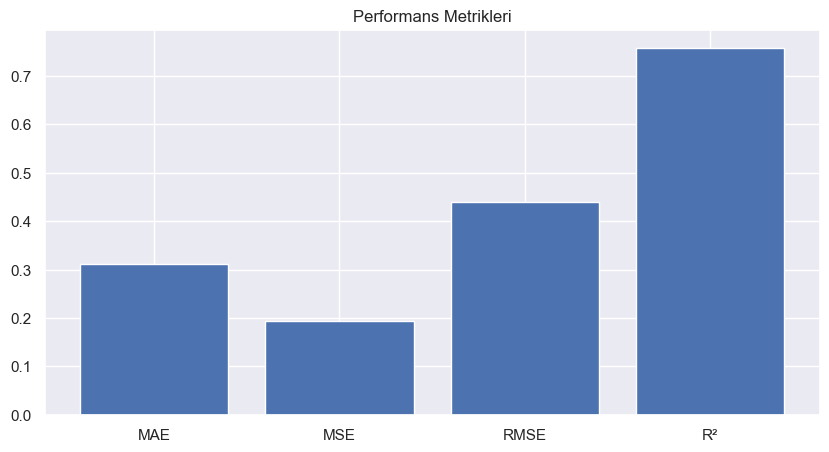

In [98]:
# Performans Metrikleri Bar Grafiği
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
plt.figure(figsize=(10,5))
plt.bar(metrics.keys(), metrics.values())
plt.title('Performans Metrikleri')
plt.show()

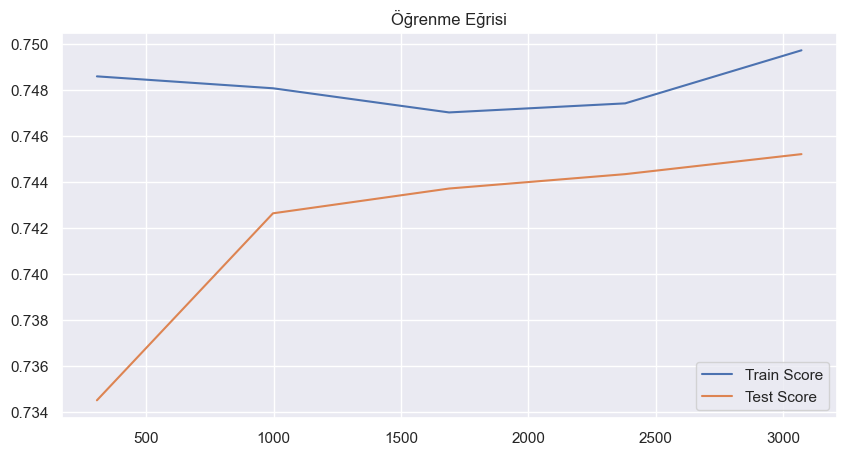

In [99]:
# Öğrenme Eğrisi
train_sizes, train_scores, test_scores = learning_curve(lr, X_scaled, y, cv=5)
plt.figure(figsize=(10,5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.title('Öğrenme Eğrisi')
plt.legend()
plt.show()

In [100]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))


11636.117633074944

Test verilerinde 11636 hata yapıyor, bu da modelin o kadar iyi performans gösteremeyebileceğini, ancak deneme ve test verilerinde aynı şekilde davrandığı için aşırı uyum göstermediğini söylüyor

In [101]:
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)
df_eval

Prediction    Target
0    10816.130777  15200.00
1     3186.352409   4999.00
2    16705.614070  24193.65
3    10488.306269   9000.00
4    25789.124492  17900.00
..            ...       ...
763  62321.393655  72000.00
764  38096.927022  38300.00
765  15165.830403  15800.00
766   3774.639625   5300.00
767  10224.322366  10000.00

[768 rows x 2 columns]

In [102]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

Prediction    Target     Residual  Difference%
0    10816.130777  15200.00  4383.869223    28.841245
1     3186.352409   4999.00  1812.647591    36.260204
2    16705.614070  24193.65  7488.035930    30.950419
3    10488.306269   9000.00 -1488.306269    16.536736
4    25789.124492  17900.00 -7889.124492    44.073321
..            ...       ...          ...          ...
763  62321.393655  72000.00  9678.606345    13.442509
764  38096.927022  38300.00   203.072978     0.530217
765  15165.830403  15800.00   634.169597     4.013732
766   3774.639625   5300.00  1525.360375    28.780384
767  10224.322366  10000.00  -224.322366     2.243224

[768 rows x 4 columns]

In [103]:
df_eval.describe()

Prediction         Target      Residual  Difference%
count    768.000000     768.000000    768.000000   768.000000
mean   16224.315912   18699.804258   2475.488345    37.608700
std    12716.669208   19775.706932  11377.158360    82.013575
min     1496.523096     800.000000 -50751.290095     0.026588
25%     7808.465274    7300.000000  -1929.882880    11.430844
50%    11882.779949   11425.000000    261.712222    22.583975
75%    21522.732636   22000.000000   3376.180291    37.671563
max    65976.629541  125000.000000  84976.335950  1237.836344

##### max_rows

In [105]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

Prediction    Target  Residual  Difference%
300     7902.10   7900.00     -2.10         0.03
495     8990.63   9000.00      9.37         0.10
615    14467.23  14500.00     32.77         0.23
106     3809.34   3800.00     -9.34         0.25
220    12934.36  12900.00    -34.36         0.27
625    17559.73  17500.00    -59.73         0.34
719    24194.73  24300.00    105.27         0.43
764    38096.93  38300.00    203.07         0.53
560    61156.87  61500.00    343.13         0.56
667     2916.68   2900.00    -16.68         0.58
496     6539.04   6500.00    -39.04         0.60
741     3726.85   3750.00     23.15         0.62
408    10731.99  10800.00     68.01         0.63
29      6949.10   6999.00     49.90         0.71
114    28294.71  28500.00    205.29         0.72
118     9429.26   9500.00     70.74         0.74
167    24194.73  23999.00   -195.73         0.82
490    35801.03  35500.00   -301.03         0.85
270     9032.47   8950.00    -82.47         0.92
381    30781.74  30500.00   -281.74         0.92
218    32549.25  32900.00    350.75         1.07
571    43418.19  43900.00    481.81         1.10
149    20764.53  21000.00    235.47         1.12
751     2618.53   2650.00     31.47         1.19
756    21259.71  21000.00   -259.71         1.24
262     5824.95   5900.00     75.05         1.27
177     1569.75   1550.00    -19.75         1.27
459    24308.54  23999.00   -309.54         1.29
711     8611.48   8500.00   -111.48         1.31
137    27670.96  27300.00   -370.96         1.36
178     9129.64   9000.00   -129.64         1.44
481    20202.68  20500.00    297.32         1.45
162    11330.61  11500.00    169.39         1.47
673    13119.00  12900.00   -219.00         1.70
589     4125.68   4200.00     74.32         1.77
59     10702.95  10900.00    197.05         1.81
350     8737.68   8899.00    161.32         1.81
614    43336.98  42500.00   -836.98         1.97
505    21215.92  20800.00   -415.92         2.00
468     9691.18   9500.00   -191.18         2.01
498    11443.17  11200.00   -243.17         2.17
279    10466.75  10700.00    233.25         2.18
163    12618.66  12900.00    281.34         2.18
767    10224.32  10000.00   -224.32         2.24
219    24387.14  24999.00    611.86         2.45
189     9835.69   9599.00   -236.69         2.47
366    18286.49  18800.00    513.51         2.73
370    22089.34  21500.00   -589.34         2.74
760    50255.83  48900.00  -1355.83         2.77
17     24194.73  24900.00    705.27         2.83
268    27704.92  26900.00   -804.92         2.99
568     3006.58   3100.00     93.42         3.01
25     30809.15  29900.00   -909.15         3.04
677     6494.87   6300.00   -194.87         3.09
28     17231.46  16700.00   -531.46         3.18
58     14413.96  14900.00    486.04         3.26
416    12088.62  12499.00    410.38         3.28
18     12754.99  13200.00    445.01         3.37
709    33322.00  34500.00   1178.00         3.41
513     8975.60   9300.00    324.40         3.49
598    38823.69  37500.00  -1323.69         3.53
152    50180.28  52055.25   1874.97         3.60
694    18653.06  18000.00   -653.06         3.63
355    11369.54  10950.00   -419.54         3.83
315     5910.40   6150.00    239.60         3.90
291    44364.76  42700.00  -1664.76         3.90
551     8625.01   8300.00   -325.01         3.92
765    15165.83  15800.00    634.17         4.01
410     7284.13   7000.00   -284.13         4.06
134     9579.77   9990.00    410.23         4.11
463     8143.73   8500.00    356.27         4.19
316    29673.84  31000.00   1326.16         4.28
323    51650.85  49500.00  -2150.85         4.35
146    31205.59  29900.00  -1305.59         4.37
27      4774.83   5000.00    225.17         4.50
254     8363.45   8000.00   -363.45         4.54
657    15455.87  16200.00    744.13         4.59
658    36155.32  37900.00   1744.68         4.60
383    22399.84  23500.00   1100.16         4.68
133    25661.98  24500.00  -1161.98         4.74
46      6917.90   6600.00   -317.90 

#### model kaydetme

In [109]:
import joblib
joblib.dump(lr, 'models\linear_regression_model.pkl')
print('Model saved as linear_regression_model.pkl')

Model saved as linear_regression_model.pkl


### 5.2. Ridge Regression

In [111]:
# Linear modeller için scaled veri hazırlığı
car_linear = pd.read_csv('processedData\Car_preproccesed.csv')
X_linear = car_linear.drop('log_price', axis=1)
y_linear = car_linear['log_price']

# Scaling
scaler = StandardScaler()
X_linear_scaled = scaler.fit_transform(X_linear)

# Train-test split
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_scaled, y_linear, test_size=0.2, random_state=42
)

print(f"Linear models training data shape: {X_train_linear.shape}")

Linear models training data shape: (3072, 17)


In [116]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_ridge = ridge_model.predict(X_train_linear)
y_pred_test_ridge = ridge_model.predict(X_test_linear)

# Performans metrikleri (log değerlerini normal fiyata çeviriyoruz)
rmse_train_ridge = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_ridge)))
rmse_test_ridge = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_ridge)))
r2_train_ridge = r2_score(y_train_linear, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_linear, y_pred_test_ridge)

print("\n📊 Ridge Regression Sonuçları:")
print(f"RMSE Train: {rmse_train_ridge:.2f}")
print(f"RMSE Test: {rmse_test_ridge:.2f}")
print(f"R² Train: {r2_train_ridge:.4f}")
print(f"R² Test: {r2_test_ridge:.4f}")


📊 Ridge Regression Sonuçları:
RMSE Train: 10461.10
RMSE Test: 10115.93
R² Train: 0.7531
R² Test: 0.7310


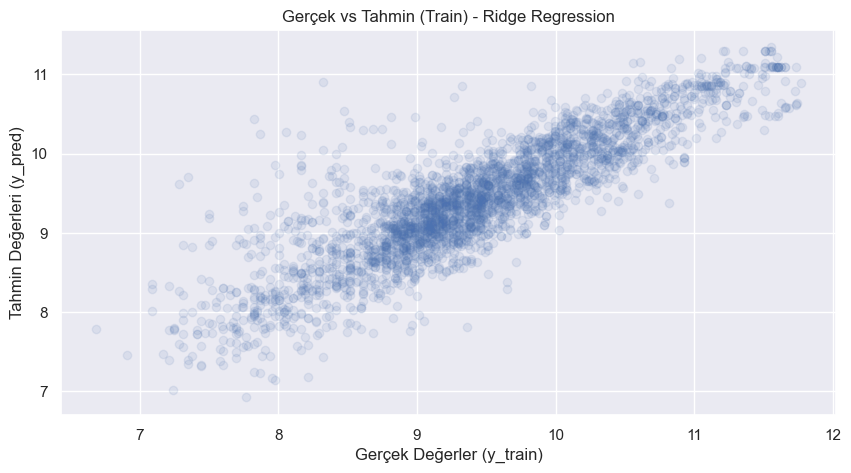

In [113]:
# Gerçek vs Tahmin (Train)
plt.figure(figsize=(10,5))
plt.scatter(y_train_linear, y_pred_train_ridge, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_train)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Train) - Ridge Regression')
plt.show()

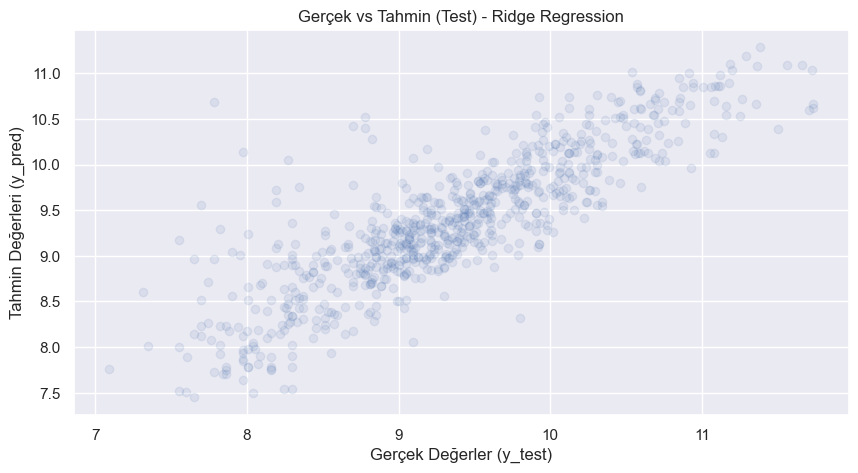

In [114]:
# Gerçek vs Tahmin (Test)
plt.figure(figsize=(10,5))
plt.scatter(y_test_linear, y_pred_test_ridge, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Test) - Ridge Regression')
plt.show()

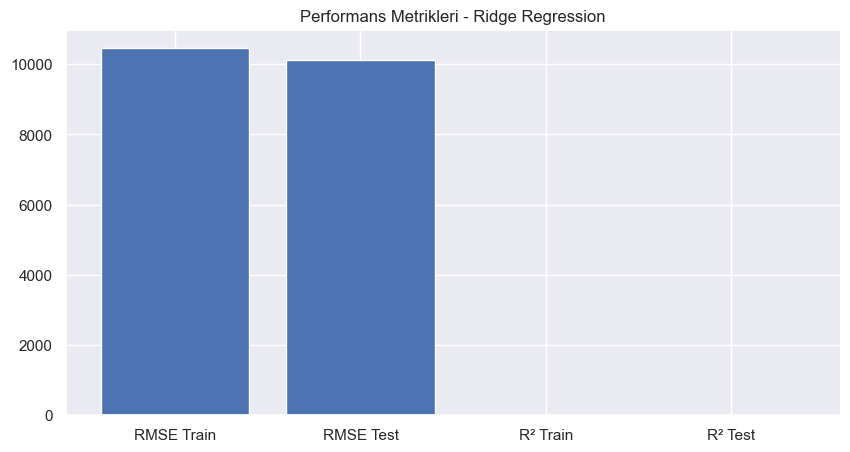

In [115]:
# Performans Metrikleri Bar Grafiği
metrics_ridge = {
    'RMSE Train': rmse_train_ridge,
    'RMSE Test': rmse_test_ridge,
    'R² Train': r2_train_ridge,
    'R² Test': r2_test_ridge
}
plt.figure(figsize=(10,5))
plt.bar(metrics_ridge.keys(), metrics_ridge.values())
plt.title('Performans Metrikleri - Ridge Regression')
plt.show()

In [118]:
import joblib
joblib.dump(lr, r'models/ridge_regression_model.pkl')
print('Model saved as ridge_regression_model.pkl')

Model saved as ridge_regression_model.pkl


### 5.3. Lasso Regression

In [119]:
# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_lasso = lasso_model.predict(X_train_linear)
y_pred_test_lasso = lasso_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_lasso = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_lasso)))
rmse_test_lasso = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_lasso)))
r2_train_lasso = r2_score(y_train_linear, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test_linear, y_pred_test_lasso)

print("\n📊 Lasso Regression Sonuçları:")
print(f"RMSE Train: {rmse_train_lasso:.2f}")
print(f"RMSE Test: {rmse_test_lasso:.2f}")
print(f"R² Train: {r2_train_lasso:.4f}")
print(f"R² Test: {r2_test_lasso:.4f}")


📊 Lasso Regression Sonuçları:
RMSE Train: 14939.50
RMSE Test: 13493.39
R² Train: 0.6175
R² Test: 0.6142


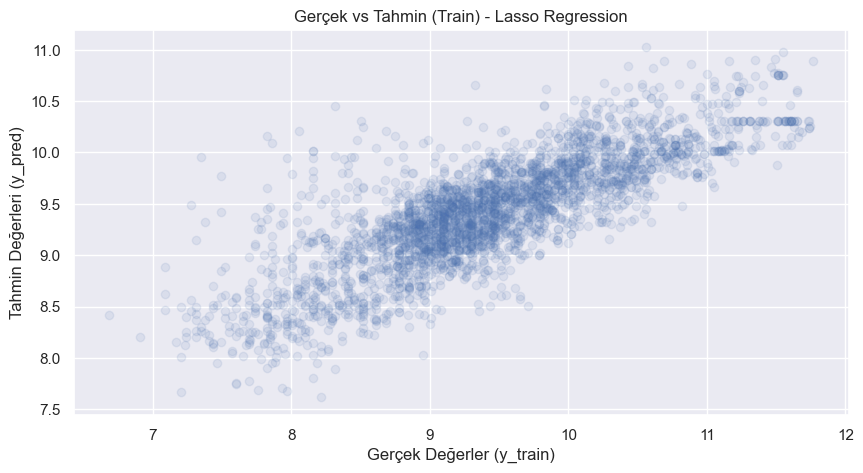

In [121]:
# Gerçek vs Tahmin (Train)
plt.figure(figsize=(10,5))
plt.scatter(y_train_linear, y_pred_train_lasso, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_train)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Train) - Lasso Regression')
plt.show()

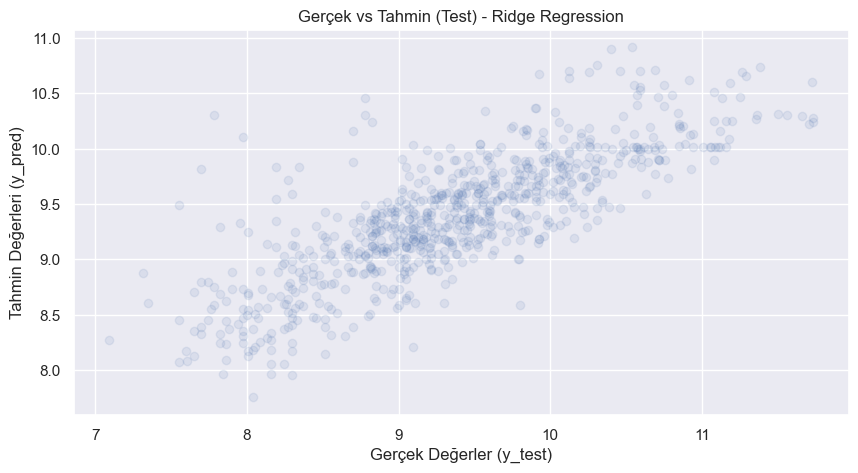

In [122]:
# Gerçek vs Tahmin (Test)
plt.figure(figsize=(10,5))
plt.scatter(y_test_linear, y_pred_test_lasso, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Test) - Ridge Regression')
plt.show()

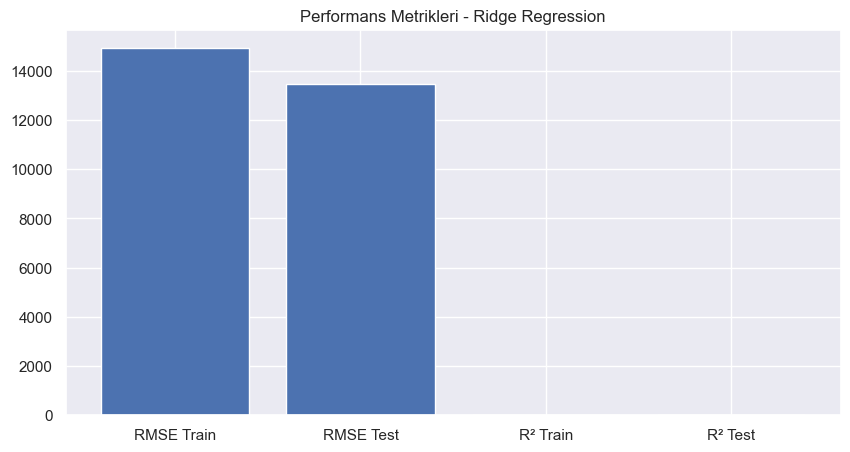

In [123]:
# Performans Metrikleri Bar Grafiği
metrics_lasso = {
    'RMSE Train': rmse_train_lasso,
    'RMSE Test': rmse_test_lasso,
    'R² Train': r2_train_lasso,
    'R² Test': r2_test_lasso
}
plt.figure(figsize=(10,5))
plt.bar(metrics_lasso.keys(), metrics_lasso.values())
plt.title('Performans Metrikleri - Ridge Regression')
plt.show()

In [120]:
import joblib
joblib.dump(lr, r'models/lasso_regression_model.pkl')
print('Model saved as lasso_regression_model.pkl')

Model saved as lasso_regression_model.pkl


### 5.4. Elastic Net

In [128]:
# Elastic Net (L1 + L2 Regularization)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_elastic = elastic_model.predict(X_train_linear)
y_pred_test_elastic = elastic_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_elastic = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_elastic)))
rmse_test_elastic = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_elastic)))
r2_train_elastic = r2_score(y_train_linear, y_pred_train_elastic)
r2_test_elastic = r2_score(y_test_linear, y_pred_test_elastic)

print("\n📊 Elastic Net Sonuçları:")
print(f"RMSE Train: {rmse_train_elastic:.2f}")
print(f"RMSE Test: {rmse_test_elastic:.2f}")
print(f"R² Train: {r2_train_elastic:.4f}")
print(f"R² Test: {r2_test_elastic:.4f}")


📊 Elastic Net Sonuçları:
RMSE Train: 13641.71
RMSE Test: 12560.74
R² Train: 0.6864
R² Test: 0.6700


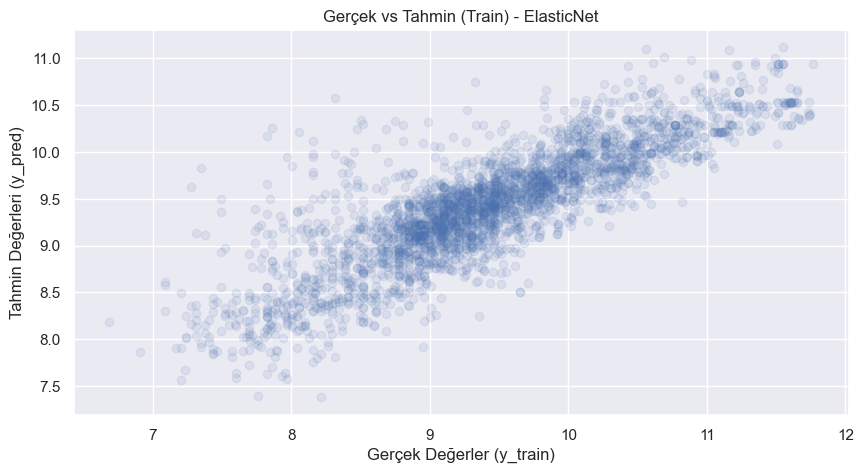

In [132]:
# Gerçek vs Tahmin (Train)
plt.figure(figsize=(10,5))
plt.scatter(y_train_linear, y_pred_train_elastic, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_train)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Train) - ElasticNet')
plt.show()

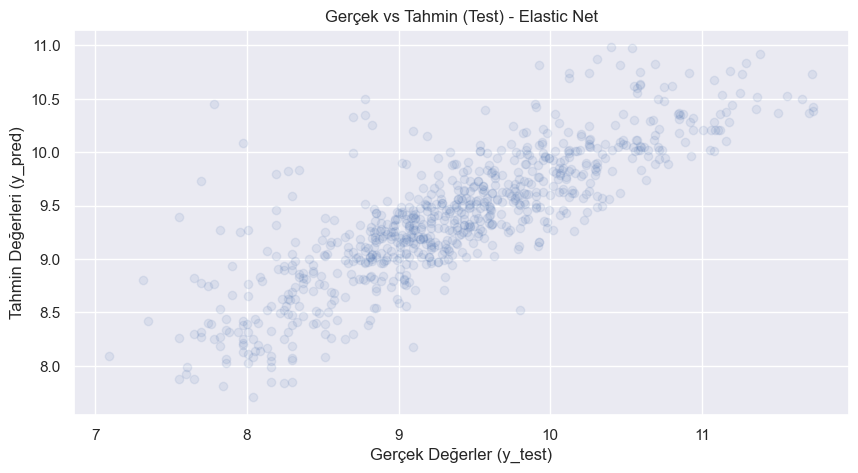

In [134]:
# Gerçek vs Tahmin (Test)
plt.figure(figsize=(10,5))
plt.scatter(y_test_linear, y_pred_test_elastic, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Test) - Elastic Net')
plt.show()

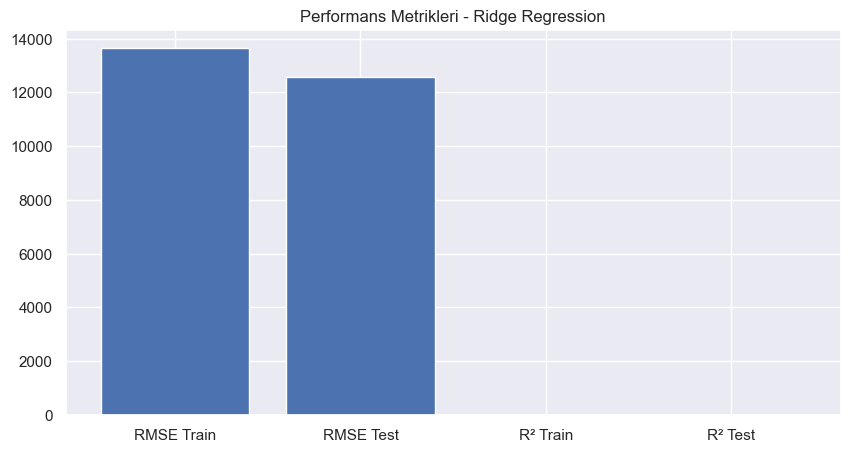

In [135]:
# Performans Metrikleri Bar Grafiği
metrics_elastic = {
    'RMSE Train': rmse_train_elastic,
    'RMSE Test': rmse_test_elastic,
    'R² Train': r2_train_elastic,
    'R² Test': r2_test_elastic
}
plt.figure(figsize=(10,5))
plt.bar(metrics_elastic.keys(), metrics_elastic.values())
plt.title('Performans Metrikleri - Ridge Regression')
plt.show()

In [125]:
import joblib
joblib.dump(lr, r'models/elasticnet_model.pkl')
print('Model saved as elasticnet_model.pkl')

Model saved as elasticnet_model.pkl


### 5.5. Random Forest

In [136]:
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

In [140]:
car = pd.read_csv('processedData/Car_cleaned_with_Model.csv') 

In [141]:
# Yalnızca kategorik sütunlar
le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dict[lbl] = num
print('Brand Label saved')

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dict[lbl] = num
print('Body Label saved')

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dict[lbl] = num
print('Engine Type Label saved')

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dict[lbl] = num
print('Registration Label saved')

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dict[lbl] = num
print('Model Label saved')

car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)
car_2.head()

Brand Label saved
Body Label saved
Engine Type Label saved
Registration Label saved
Model Label saved


Price  Mileage  EngineV  Year  brand_enc  body_enc  engine_type_enc  \
0  4200.00      277     2.00  1991          1         3                3   
1  7900.00      427     2.90  1999          2         5                0   
2 13300.00      358     5.00  2003          2         3                1   
3 23000.00      240     4.20  2007          0         0                3   
4 18300.00      120     2.00  2011          5         0                3   

   registration_enc  model_enc  
0                 1         17  
1                 1        248  
2                 1        222  
3                 1        211  
4                 1        214

In [142]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [145]:
rf_1 = RandomForestRegressor()
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [147]:
y_pred_train = rf_1.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE on Train data: {rmse_train}')

RMSE on Train data: 2003.2715841035329


In [148]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'RMSE on Test data: {rmse_test}')

RMSE on Test data: 4940.126061539427


In [149]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print(f'Training Score: {r2_score(y_train, y_pred_train)}')

Training Score: 0.9886599877366467


In [150]:
y_pred_test = rf_1.predict(X_test)

print(f'Testing Score: {r2_score(y_test, y_pred_test)}')

Testing Score: 0.9397526972447193


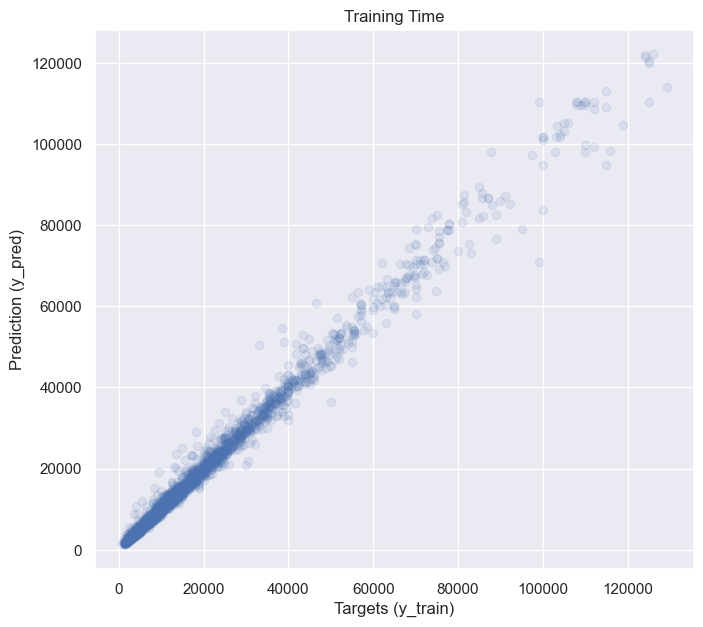

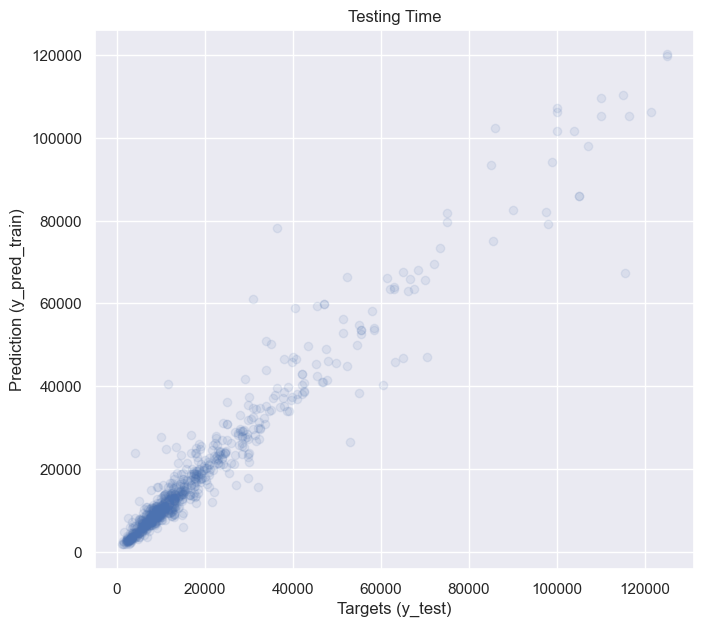

In [151]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.title('Training Time')
plt.show()

plt.figure(figsize=(17,7))
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred_train)')
plt.title('Testing Time') 
plt.show()

Text(0.5, 1.0, 'Residuals Test PDF')

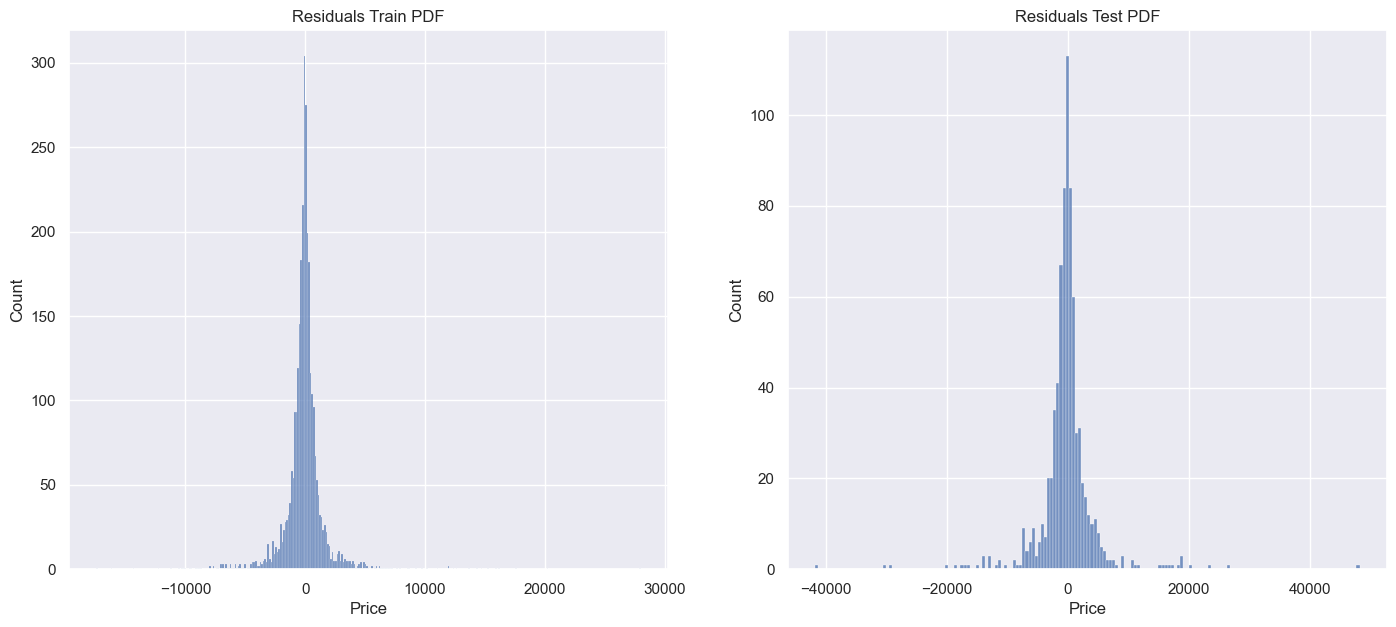

In [152]:
residuals_train = (y_train - rf_1.predict(X_train))
residuals_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residuals_train)
plt.title('Residuals Train PDF')

plt.subplot(1,2,2)
sns.histplot(residuals_test)
plt.title('Residuals Test PDF') 

In [153]:
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

Prediction    Target  Residual  Difference%
0      17917.90  19000.00   1082.10         5.70
1       5983.08   5500.00   -483.08         8.78
2      25673.48  19200.00  -6473.48        33.72
3      12805.96  11900.00   -905.96         7.61
4       8683.38   7750.00   -933.38        12.04
5      25289.69  13500.00 -11789.69        87.33
6      13093.72  12700.00   -393.72         3.10
7      53650.14  55555.00   1904.86         3.43
8       4768.40   1500.00  -3268.40       217.89
9      12005.00  11000.00  -1005.00         9.14
10     10921.19  10600.00   -321.19         3.03
11     74964.63  85555.00  10590.37        12.38
12      9207.98   6800.00  -2407.98        35.41
13      3124.46   4800.00   1675.54        34.91
14     41460.06  47777.00   6316.94        13.22
15      8839.47   9800.00    960.53         9.80
16      7340.38   4999.00  -2341.38        46.84
17     14381.37  18500.00   4118.63        22.26
18      8911.44   8300.00   -611.44         7.37
19      6114.97   2900.00  -3214.97       110.86
20     11248.00  13500.00   2252.00        16.68
21     10642.74  12500.00   1857.26        14.86
22      9223.00   9300.00     77.00         0.83
23     11200.00   9999.00  -1201.00        12.01
24     31242.88  24000.00  -7242.88        30.18
25      8357.46   8300.00    -57.46         0.69
26     21579.47  13900.00  -7679.47        55.25
27      9201.20  10400.00   1198.80        11.53
28      8910.41   9000.00     89.59         1.00
29     13030.90  13900.00    869.10         6.25
30     13047.82  12900.00   -147.82         1.15
31     14840.50  14300.00   -540.50         3.78
32     32489.97  30900.00  -1589.97         5.15
33     10662.99   8100.00  -2562.99        31.64
34     23484.00  14500.00  -8984.00        61.96
35      9486.97   6000.00  -3486.97        58.12
36      8313.16   9200.00    886.84         9.64
37     21892.76  18500.00  -3392.76        18.34
38     18078.14  20000.00   1921.86         9.61
39     35163.27  33800.00  -1363.27         4.03
40      3054.23   3000.00    -54.23         1.81
41     10360.95  10700.00    339.05         3.17
42      8336.49   7500.00   -836.49        11.15
43     27164.38  23900.00  -3264.38        13.66
44      3596.47   3500.00    -96.47         2.76
45     40325.06  60500.00  20174.94        33.35
46     11237.97  12999.00   1761.03        13.55
47     59307.05  45500.00 -13807.05        30.35
48     13488.49  11900.00  -1588.49        13.35
49      3802.49   4600.00    797.51        17.34
50      4722.77   5000.00    277.23         5.54
51      7752.19   9600.00   1847.81        19.25
52      9019.02   9999.00    979.98         9.80
53      9941.46  10600.00    658.54         6.21
54      9790.03   9600.00   -190.03         1.98
55      6836.74   6800.00    -36.74         0.54
56     13732.29  16500.00   2767.71        16.77
57     28342.96  16800.00 -11542.96        68.71
58      8839.47   9990.00   1150.53        11.52
59     23865.98   4100.00 -19765.98       482.10
60     28167.95  31500.00   3332.05        10.58
61     58900.56  40500.00 -18400.56        45.43
62      8777.40   7777.00  -1000.40        12.86
63     20990.51  22000.00   1009.49         4.59
64     24414.80  23000.00  -1414.80         6.15
65     15646.99  32000.00  16353.01        51.10
66      8878.87   6999.00  -1879.87        26.86
67     34015.16  38764.00   4748.84        12.25
68      4754.96   4700.00    -54.96         1.17
69      9173.46   7899.00  -1274.46        16.13
70      8607.04   7700.00   -907.04        11.78
71     13760.13  14500.00    739.87         5.10
72     29208.96  28000.00  -1208.96         4.32
73     24931.00  11200.00 -13731.00       122.60
74      8296.00   2400.00  -5896.00       245.67
75      9494.98   9600.00    105.02         1.09
76     94061.15  99000.00   4938.85         4.99
77      3447.49   3400.00    -47.49         1.40
78     27115.00  24950.00  -2165.00         8.68
79      7895.50   8000.00    104.50         1.31
80     14102.03  14500.00    397.97 

In [154]:
df_eval.describe()

Prediction    Target  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     18775.60  18602.02   -173.58        17.02
std      19328.53  20139.56   4940.27        28.53
min       1848.95   1200.00 -41736.16         0.00
25%       7821.34   7500.00  -1350.39         4.25
50%      11870.79  11900.00   -129.25         9.38
75%      21657.43  20999.06    996.71        20.35
max     120077.99 125000.00  48223.06       482.10

In [155]:
rf_random = RandomForestRegressor()

random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [100, 200]}

rf_random = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=8,
    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [157]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.9270808883045555)

In [158]:
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

634.2938354680952

In [159]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4212.3041406897555

model hala overfit durumda. Eğitim error 630 ve test error 4177 olarak çıkıyor.

Şimdi GridSearchCV ile deneme 

In [160]:
rf_grid_model = RandomForestRegressor()

param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}

rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [161]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=3, n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.9283120308307217)

In [162]:
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

994.7015047503445

#### 5.5.1. Hiperparametre optimizasyonu

In [163]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4212.3041406897555

In [164]:
rf_grid_model_2 = RandomForestRegressor()

param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}

rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [165]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.9282590313098451)

In [166]:
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

987.0303009958333

In [167]:
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4214.027563448271

Text(0.5, 1.0, 'Testing Time')

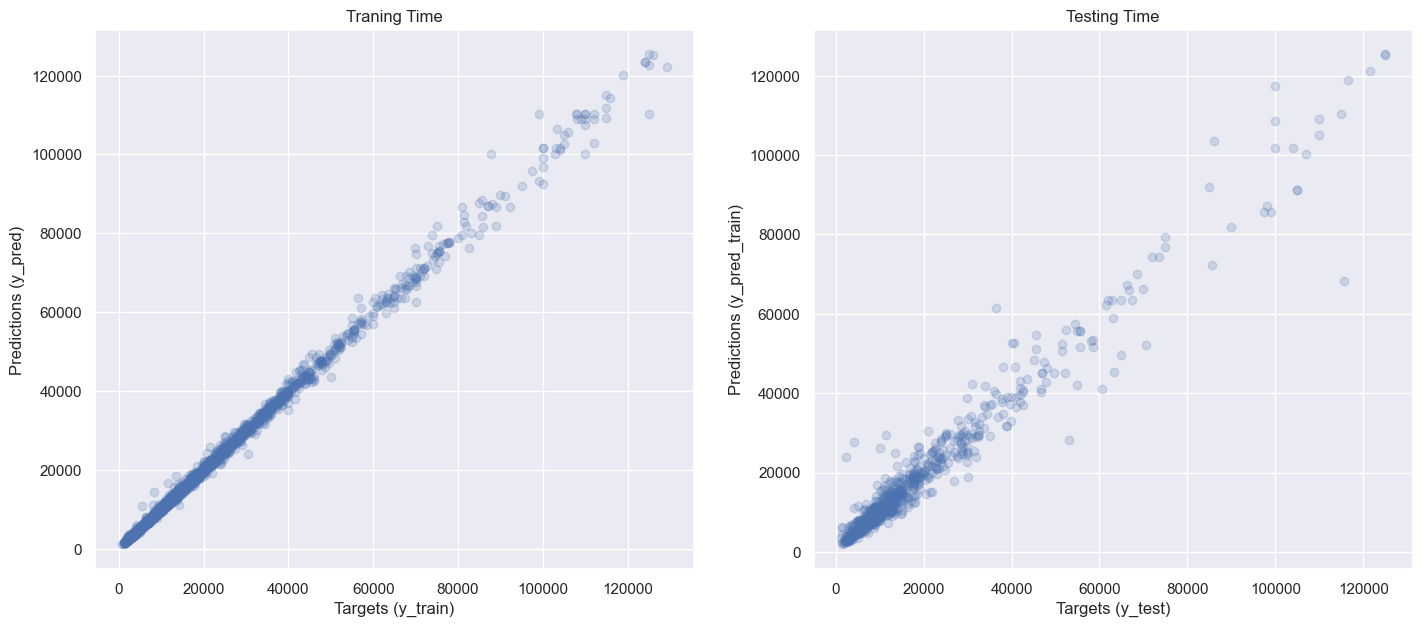

In [168]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2) 
plt.xlabel('Targets (y_train)') 
plt.ylabel('Predictions (y_pred)') 
plt.title('Traning Time') 

y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2) 
plt.xlabel('Targets (y_test)') 
plt.ylabel('Predictions (y_pred_train)') 
plt.title('Testing Time') 

In [169]:
print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9972470721238144
Testing r2_score: 0.9561614390270411


Text(0.5, 1.0, 'Testting Residual PDF')

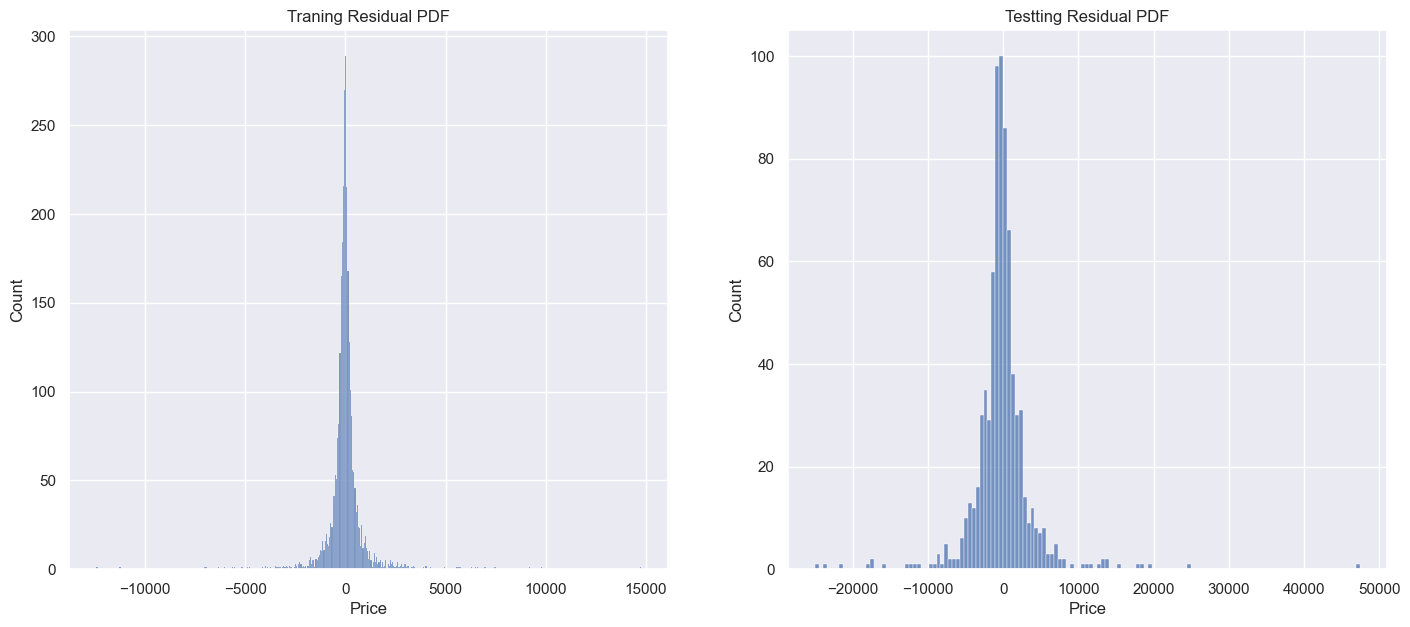

In [170]:
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train) 
plt.title('Traning Residual PDF') 

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test) 
plt.title('Testting Residual PDF') 

In [171]:
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data
df_eval

Prediction   Tareget  Residual  Difference%
0      19191.48  19000.00   -191.48         1.01
1       5044.28   5500.00    455.72         8.29
2      24892.72  19200.00  -5692.72        29.65
3      12248.85  11900.00   -348.85         2.93
4       7744.98   7750.00      5.02         0.06
5      24998.31  13500.00 -11498.31        85.17
6      13013.27  12700.00   -313.27         2.47
7      55555.00  55555.00      0.00         0.00
8       4529.69   1500.00  -3029.69       201.98
9      12124.75  11000.00  -1124.75        10.22
10     11535.68  10600.00   -935.68         8.83
11     72343.33  85555.00  13211.67        15.44
12      8498.25   6800.00  -1698.25        24.97
13      4305.21   4800.00    494.79        10.31
14     42894.83  47777.00   4882.17        10.22
15      8805.65   9800.00    994.35        10.15
16      7928.65   4999.00  -2929.65        58.60
17     14693.11  18500.00   3806.89        20.58
18      8870.64   8300.00   -570.64         6.88
19      6189.23   2900.00  -3289.23       113.42
20      9479.08  13500.00   4020.92        29.78
21     10094.96  12500.00   2405.04        19.24
22      8950.92   9300.00    349.08         3.75
23     11154.49   9999.00  -1155.49        11.56
24     28357.35  24000.00  -4357.35        18.16
25      8643.89   8300.00   -343.89         4.14
26     21592.11  13900.00  -7692.11        55.34
27      9175.00  10400.00   1225.00        11.78
28      8757.57   9000.00    242.43         2.69
29     12755.84  13900.00   1144.16         8.23
30     12833.72  12900.00     66.28         0.51
31     14449.52  14300.00   -149.52         1.05
32     29821.17  30900.00   1078.83         3.49
33      9444.19   8100.00  -1344.19        16.59
34     12836.77  14500.00   1663.23        11.47
35      7230.30   6000.00  -1230.30        20.50
36      8069.98   9200.00   1130.02        12.28
37     20951.83  18500.00  -2451.83        13.25
38     19365.60  20000.00    634.40         3.17
39     37069.47  33800.00  -3269.47         9.67
40      3477.03   3000.00   -477.03        15.90
41     10040.82  10700.00    659.18         6.16
42      9093.65   7500.00  -1593.65        21.25
43     27859.88  23900.00  -3959.88        16.57
44      3797.24   3500.00   -297.24         8.49
45     41000.32  60500.00  19499.68        32.23
46     11197.53  12999.00   1801.47        13.86
47     54762.50  45500.00  -9262.50        20.36
48     13021.65  11900.00  -1121.65         9.43
49      5320.69   4600.00   -720.69        15.67
50      4653.94   5000.00    346.06         6.92
51      7708.31   9600.00   1891.69        19.71
52      8878.10   9999.00   1120.90        11.21
53      9752.88  10600.00    847.12         7.99
54      9977.21   9600.00   -377.21         3.93
55      7754.74   6800.00   -954.74        14.04
56     13630.51  16500.00   2869.49        17.39
57     19736.93  16800.00  -2936.93        17.48
58      8775.86   9990.00   1214.14        12.15
59     27661.52   4100.00 -23561.52       574.67
60     25520.49  31500.00   5979.51        18.98
61     52565.84  40500.00 -12065.84        29.79
62      9128.99   7777.00  -1351.99        17.38
63     21631.30  22000.00    368.70         1.68
64     19754.06  23000.00   3245.94        14.11
65     23852.48  32000.00   8147.52        25.46
66      8422.73   6999.00  -1423.73        20.34
67     31630.15  38764.00   7133.85        18.40
68      5448.06   4700.00   -748.06        15.92
69      9254.35   7899.00  -1355.35        17.16
70      8800.89   7700.00  -1100.89        14.30
71     14673.12  14500.00   -173.12         1.19
72     29449.83  28000.00  -1449.83         5.18
73     18604.38  11200.00  -7404.38        66.11
74     23846.83   2400.00 -21446.83       893.62
75     10197.23   9600.00   -597.23         6.22
76     85645.55  99000.00  13354.45        13.49
77      3906.89   3400.00   -506.89        14.91
78     29081.97  24950.00  -4131.97        16.56
79      7830.50   8000.00    169.50         2.12
80     14763.24  14500.00   -263.24 

In [172]:
df_eval.describe()

Prediction   Tareget  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     18770.49  18602.02   -168.47        18.57
std      19360.48  20139.56   4213.38        44.98
min       1872.88   1200.00 -25023.75         0.00
25%       7879.28   7500.00  -1420.29         4.82
50%      12002.04  11900.00   -263.19        10.91
75%      21657.71  20999.06    975.61        19.98
max     125370.00 125000.00  47394.55       893.62

In [173]:
import joblib

joblib.dump(rf_1, 'random_forest.pkl', compress=3)

['random_forest.pkl']

### 5.6. Extra Trees Regressor

In [174]:
# Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42, n_estimators=100)
et_model.fit(X_train, y_train)

# Tahminler
y_pred_train_et = et_model.predict(X_train)
y_pred_test_et = et_model.predict(X_test)

# Performans metrikleri
rmse_train_et = np.sqrt(mean_squared_error(y_train, y_pred_train_et))
rmse_test_et = np.sqrt(mean_squared_error(y_test, y_pred_test_et))
r2_train_et = r2_score(y_train, y_pred_train_et)
r2_test_et = r2_score(y_test, y_pred_test_et)

print("\n📊 Extra Trees Model Sonuçları:")
print(f"RMSE Train: {rmse_train_et:.2f}")
print(f"RMSE Test: {rmse_test_et:.2f}")
print(f"R² Train: {r2_train_et:.4f}")
print(f"R² Test: {r2_test_et:.4f}")


📊 Extra Trees Model Sonuçları:
RMSE Train: 630.17
RMSE Test: 4052.69
R² Train: 0.9989
R² Test: 0.9595


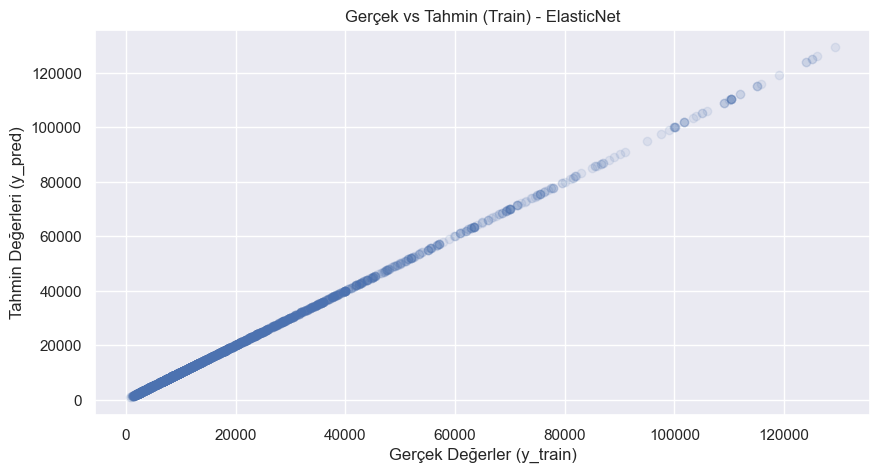

In [178]:
# Gerçek vs Tahmin (Train)
plt.figure(figsize=(10,5))
plt.scatter(y_pred_train_et, y_pred_train_et, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_train)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Train) - ElasticNet')
plt.show()

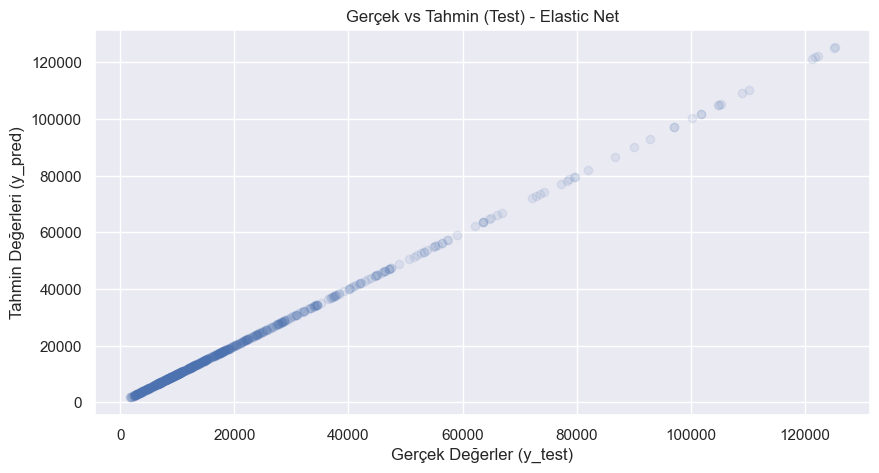

In [177]:
# Gerçek vs Tahmin (Test)
plt.figure(figsize=(10,5))
plt.scatter(y_pred_test_et, y_pred_test_et, alpha=0.1)
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Değerleri (y_pred)')
plt.title('Gerçek vs Tahmin (Test) - Elastic Net')
plt.show()

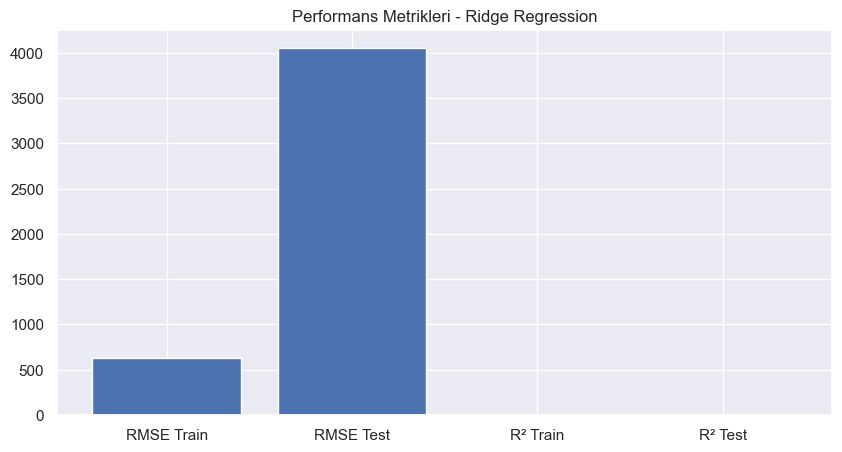

In [176]:
# Performans Metrikleri Bar Grafiği
metrics_et = {
    'RMSE Train': rmse_train_et,
    'RMSE Test': rmse_test_et,
    'R² Train': r2_train_et,
    'R² Test': r2_test_et
}
plt.figure(figsize=(10,5))
plt.bar(metrics_et.keys(), metrics_et.values())
plt.title('Performans Metrikleri - Ridge Regression')
plt.show()

In [175]:
import joblib
joblib.dump(lr, r'models/extratrees_model.pkl')
print('Model saved as extratrees_model.pkl')

Model saved as extratrees_model.pkl


### 5.7. XGBoost

In [180]:
# XGBoost için veri hazırlığı (Random Forest ile aynı veri)
car = pd.read_csv('processedData\Car_cleaned_with_Model.csv')

# Kategorik encoding (Random Forest bölümünden)
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
    brand_dict[lbl] = num

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
    body_dict[lbl] = num

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
    engine_type_dict[lbl] = num

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
    registration_dict[lbl] = num

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
    model_dict[lbl] = num

car_xgb = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

X_xgb = car_xgb.drop('Price', axis=1)
y_xgb = car_xgb['Price']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

print(f"XGBoost Training data shape: {X_train_xgb.shape}")
print(f"XGBoost Test data shape: {X_test_xgb.shape}")

XGBoost Training data shape: (3093, 8)
XGBoost Test data shape: (774, 8)


In [181]:
# XGBoost Base Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_xgb = xgb_model.predict(X_train_xgb)
y_pred_test_xgb = xgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_xgb))
r2_train_xgb = r2_score(y_train_xgb, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test_xgb, y_pred_test_xgb)

print("\n📊 XGBoost Base Model Sonuçları:")
print(f"RMSE Train: {rmse_train_xgb:.2f}")
print(f"RMSE Test: {rmse_test_xgb:.2f}")
print(f"R² Train: {r2_train_xgb:.4f}")
print(f"R² Test: {r2_test_xgb:.4f}")


📊 XGBoost Base Model Sonuçları:
RMSE Train: 1309.15
RMSE Test: 4424.91
R² Train: 0.9952
R² Test: 0.9496


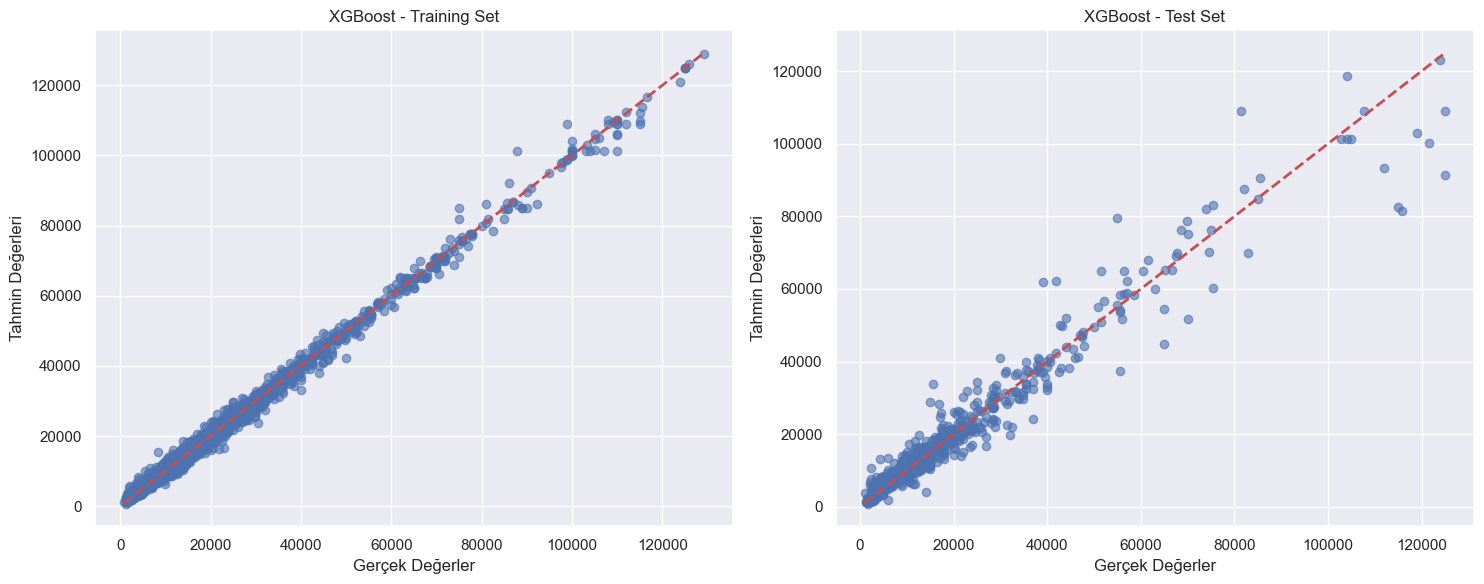

In [182]:
# XGBoost Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_xgb, alpha=0.6)
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('XGBoost - Training Set')

plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_xgb, alpha=0.6)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('XGBoost - Test Set')

plt.tight_layout()
plt.show()

In [184]:
import joblib
joblib.dump(lr, r'models/xgboost_model.pkl')
print('Model saved as xgboost_model.pkl')

Model saved as xgboost_model.pkl


### 5.8. LightGBM

In [183]:
# LightGBM Model
lgb_model = LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
lgb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_lgb = lgb_model.predict(X_train_xgb)
y_pred_test_lgb = lgb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_lgb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_lgb))
rmse_test_lgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_lgb))
r2_train_lgb = r2_score(y_train_xgb, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test_xgb, y_pred_test_lgb)

print("\n📊 LightGBM Model Sonuçları:")
print(f"RMSE Train: {rmse_train_lgb:.2f}")
print(f"RMSE Test: {rmse_test_lgb:.2f}")
print(f"R² Train: {r2_train_lgb:.4f}")
print(f"R² Test: {r2_test_lgb:.4f}")

  File "c:\MyCode\pythonProjects\ai_homework\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\onure\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



📊 LightGBM Model Sonuçları:
RMSE Train: 3053.80
RMSE Test: 4645.16
R² Train: 0.9740
R² Test: 0.9445


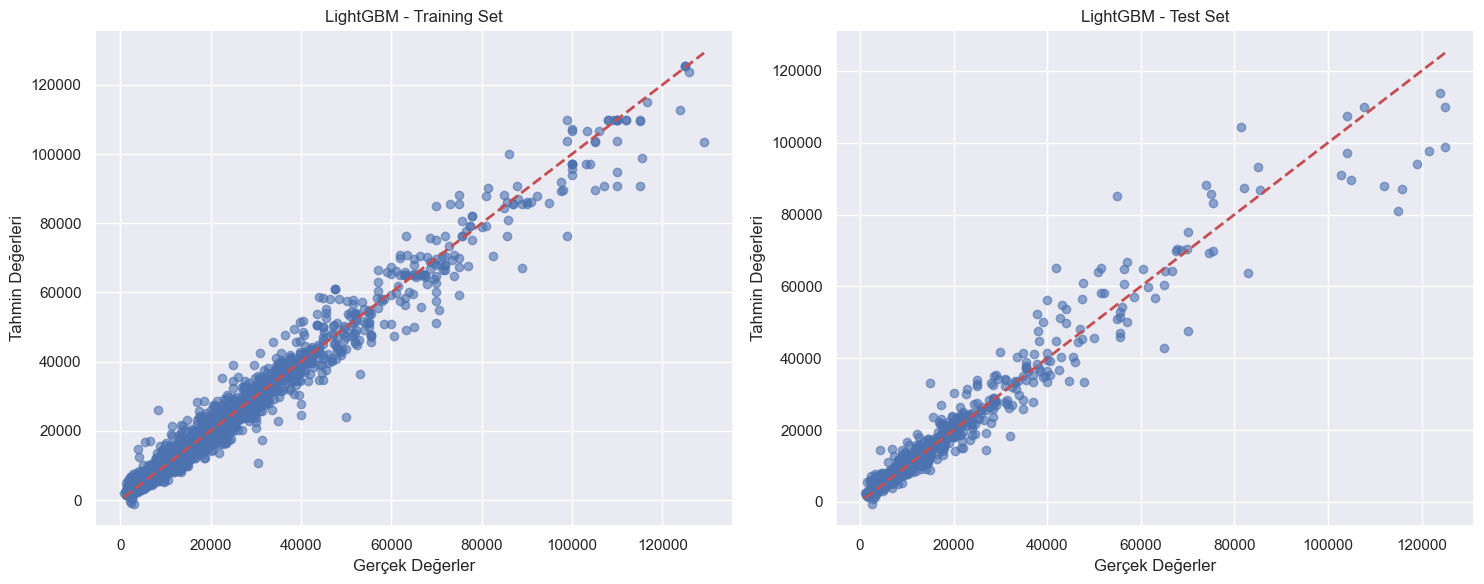

In [186]:
# LightGBM Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_lgb, alpha=0.6)
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('LightGBM - Training Set')

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_lgb, alpha=0.6)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('LightGBM - Test Set')

plt.tight_layout()
plt.show()

In [187]:
import joblib
joblib.dump(lr, r'models/lgmb_model.pkl')
print('Model saved as lgmb_model.pkl')

Model saved as lgmb_model.pkl


### 5.9. Gradient Boosting Regressor

In [188]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_gb = gb_model.predict(X_train_xgb)
y_pred_test_gb = gb_model.predict(X_test_xgb)

# Performans metrikleri
rmse_train_gb = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_gb))
r2_train_gb = r2_score(y_train_xgb, y_pred_train_gb)
r2_test_gb = r2_score(y_test_xgb, y_pred_test_gb)

print("\n📊 Gradient Boosting Model Sonuçları:")
print(f"RMSE Train: {rmse_train_gb:.2f}")
print(f"RMSE Test: {rmse_test_gb:.2f}")
print(f"R² Train: {r2_train_gb:.4f}")
print(f"R² Test: {r2_test_gb:.4f}")


📊 Gradient Boosting Model Sonuçları:
RMSE Train: 4640.05
RMSE Test: 5659.59
R² Train: 0.9399
R² Test: 0.9176


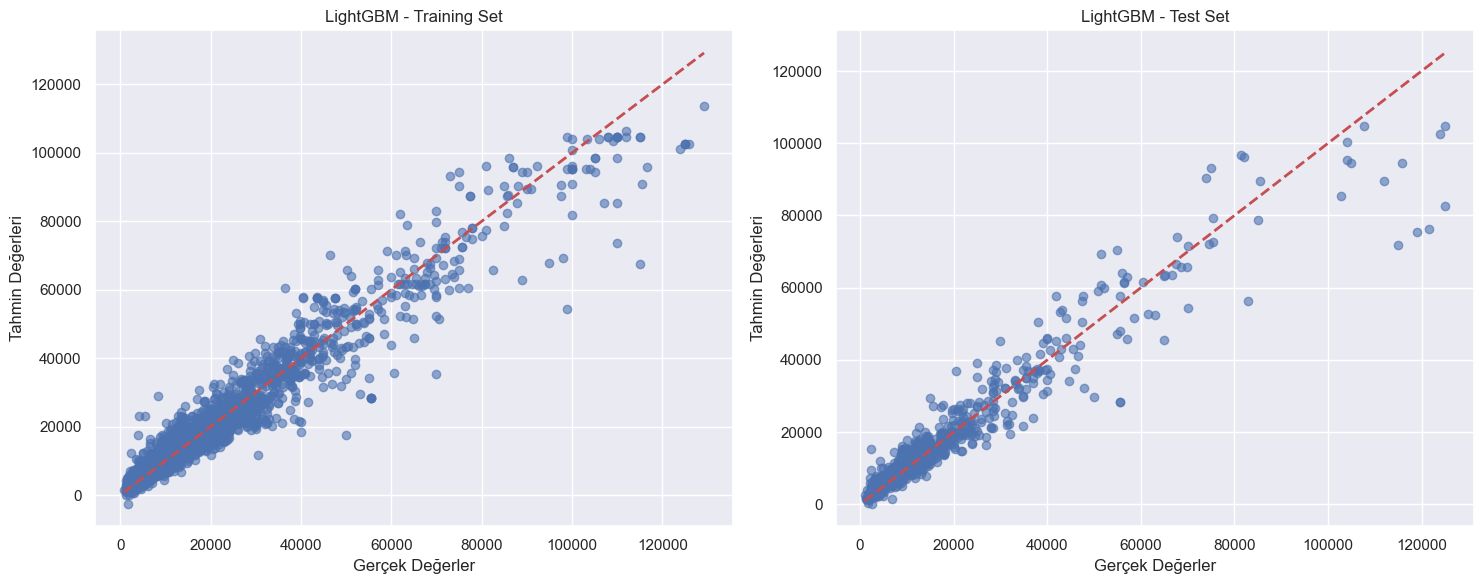

In [190]:
# LightGBM Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_gb, alpha=0.6)
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('LightGBM - Training Set')

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_gb, alpha=0.6)
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('LightGBM - Test Set')

plt.tight_layout()
plt.show()

In [189]:
import joblib
joblib.dump(lr, r'models/gb_model.pkl')
print('Model saved as gb_model.pkl')

Model saved as gb_model.pkl


### 5.10. SVR

In [191]:
# Support Vector Regression (RBF Kernel)
svr_model = SVR(kernel='rbf', C=100, gamma='scale')
svr_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_svr = svr_model.predict(X_train_linear)
y_pred_test_svr = svr_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_svr = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_svr)))
rmse_test_svr = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_svr)))
r2_train_svr = r2_score(y_train_linear, y_pred_train_svr)
r2_test_svr = r2_score(y_test_linear, y_pred_test_svr)

print("\n📊 SVR Model Sonuçları:")
print(f"RMSE Train: {rmse_train_svr:.2f}")
print(f"RMSE Test: {rmse_test_svr:.2f}")
print(f"R² Train: {r2_train_svr:.4f}")
print(f"R² Test: {r2_test_svr:.4f}")


📊 SVR Model Sonuçları:
RMSE Train: 6912.69
RMSE Test: 8989.86
R² Train: 0.8440
R² Test: 0.7039


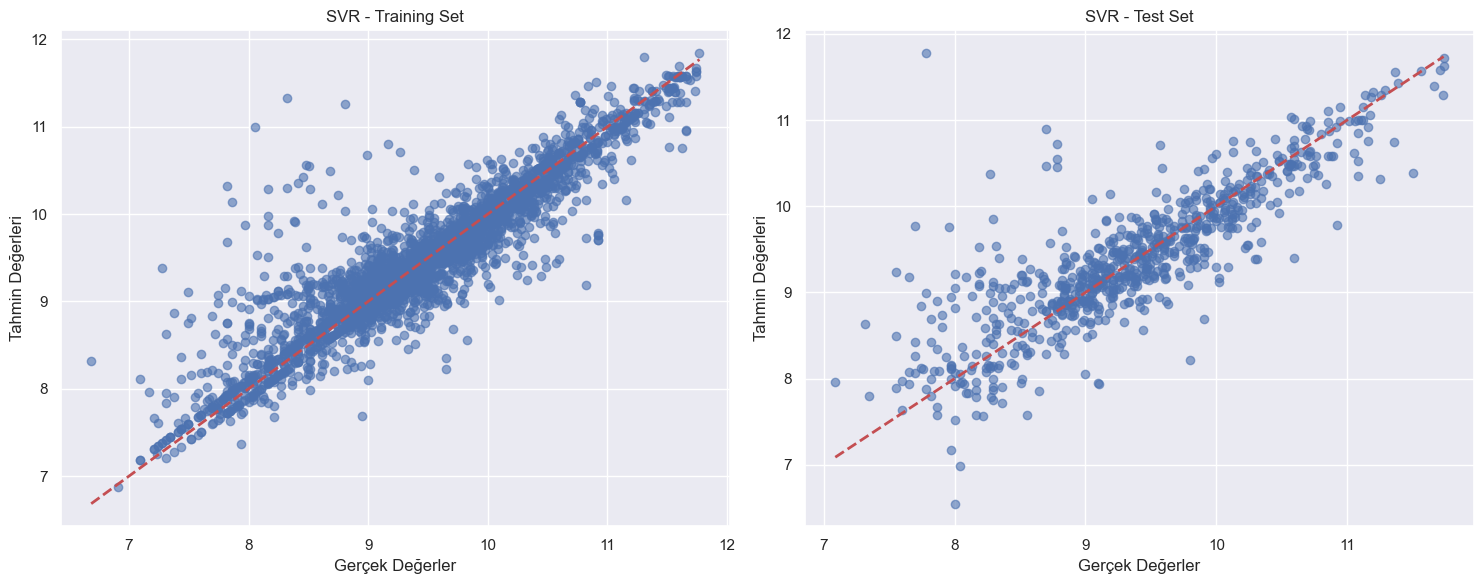

In [194]:
# SVR Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_linear, y_pred_train_svr, alpha=0.6)
plt.plot([y_train_linear.min(), y_train_linear.max()], [y_train_linear.min(), y_train_linear.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('SVR - Training Set')

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_linear, y_pred_test_svr, alpha=0.6)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('SVR - Test Set')

plt.tight_layout()
plt.show()

In [192]:
import joblib
joblib.dump(lr, r'models/svr_model.pkl')
print('Model saved as svr_model.pkl')

Model saved as svr_model.pkl


### 5.11. Voting Regressor

In [195]:
# En iyi modelleri seç ve Voting Regressor oluştur
voting_regressor = VotingRegressor([
    ('xgb', XGBRegressor(random_state=42, n_estimators=100)),
    ('lgb', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=100))
])

voting_regressor.fit(X_train_xgb, y_train_xgb)

# Tahminler
y_pred_train_voting = voting_regressor.predict(X_train_xgb)
y_pred_test_voting = voting_regressor.predict(X_test_xgb)

# Performans metrikleri
rmse_train_voting = np.sqrt(mean_squared_error(y_train_xgb, y_pred_train_voting))
rmse_test_voting = np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_voting))
r2_train_voting = r2_score(y_train_xgb, y_pred_train_voting)
r2_test_voting = r2_score(y_test_xgb, y_pred_test_voting)

print("\n📊 Voting Regressor Sonuçları:")
print(f"RMSE Train: {rmse_train_voting:.2f}")
print(f"RMSE Test: {rmse_test_voting:.2f}")
print(f"R² Train: {r2_train_voting:.4f}")
print(f"R² Test: {r2_test_voting:.4f}")


📊 Voting Regressor Sonuçları:
RMSE Train: 1921.51
RMSE Test: 4333.87
R² Train: 0.9897
R² Test: 0.9517


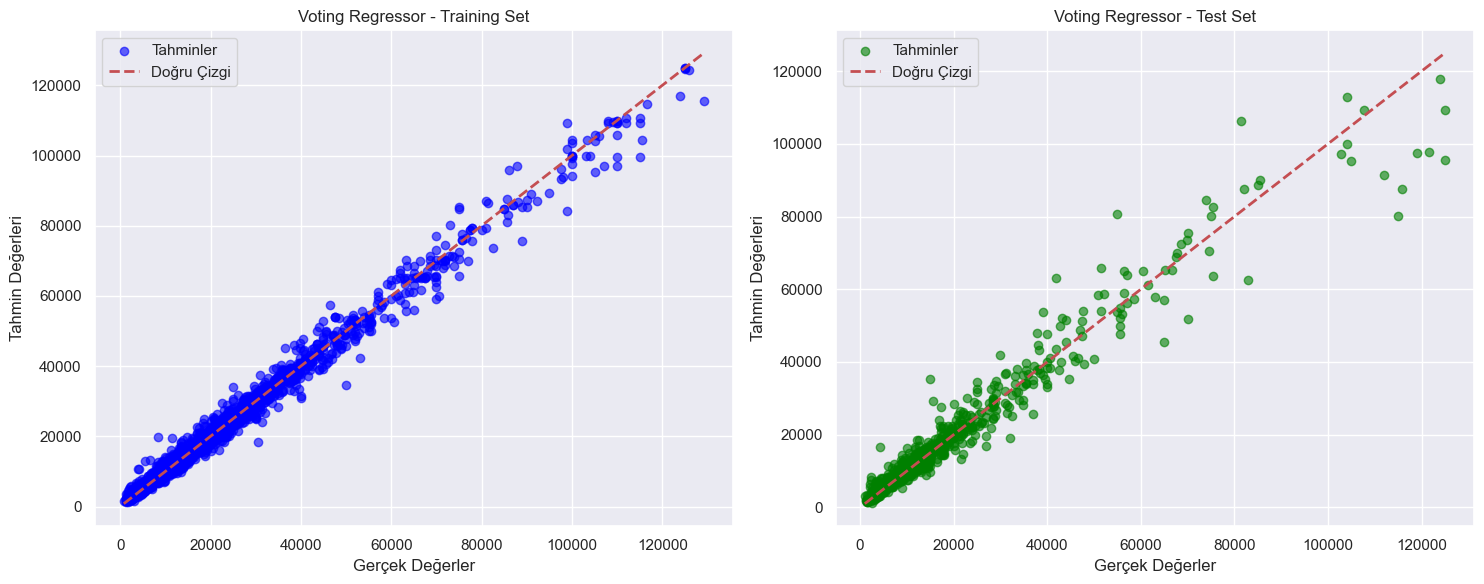

In [198]:
# Voting Regressor Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_xgb, y_pred_train_voting, alpha=0.6, color='blue', label='Tahminler')
plt.plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Voting Regressor - Training Set')
plt.legend()

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_xgb, y_pred_test_voting, alpha=0.6, color='green', label='Tahminler')
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Voting Regressor - Test Set')
plt.legend()

plt.tight_layout()
plt.show()

In [197]:
import joblib
joblib.dump(lr, r'models/vr_model.pkl')
print('Model saved as vr_model.pkl')

Model saved as vr_model.pkl


### 5.11. MLP

In [196]:
# Multi-Layer Perceptron Regressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train_linear, y_train_linear)

# Tahminler
y_pred_train_mlp = mlp_model.predict(X_train_linear)
y_pred_test_mlp = mlp_model.predict(X_test_linear)

# Performans metrikleri
rmse_train_mlp = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_mlp)))
rmse_test_mlp = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_mlp)))
r2_train_mlp = r2_score(y_train_linear, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test_linear, y_pred_test_mlp)

print("\n📊 Neural Network (MLP) Sonuçları:")
print(f"RMSE Train: {rmse_train_mlp:.2f}")
print(f"RMSE Test: {rmse_test_mlp:.2f}")
print(f"R² Train: {r2_train_mlp:.4f}")
print(f"R² Test: {r2_test_mlp:.4f}")


📊 Neural Network (MLP) Sonuçları:
RMSE Train: 7745.08
RMSE Test: 9173.08
R² Train: 0.8341
R² Test: 0.7315


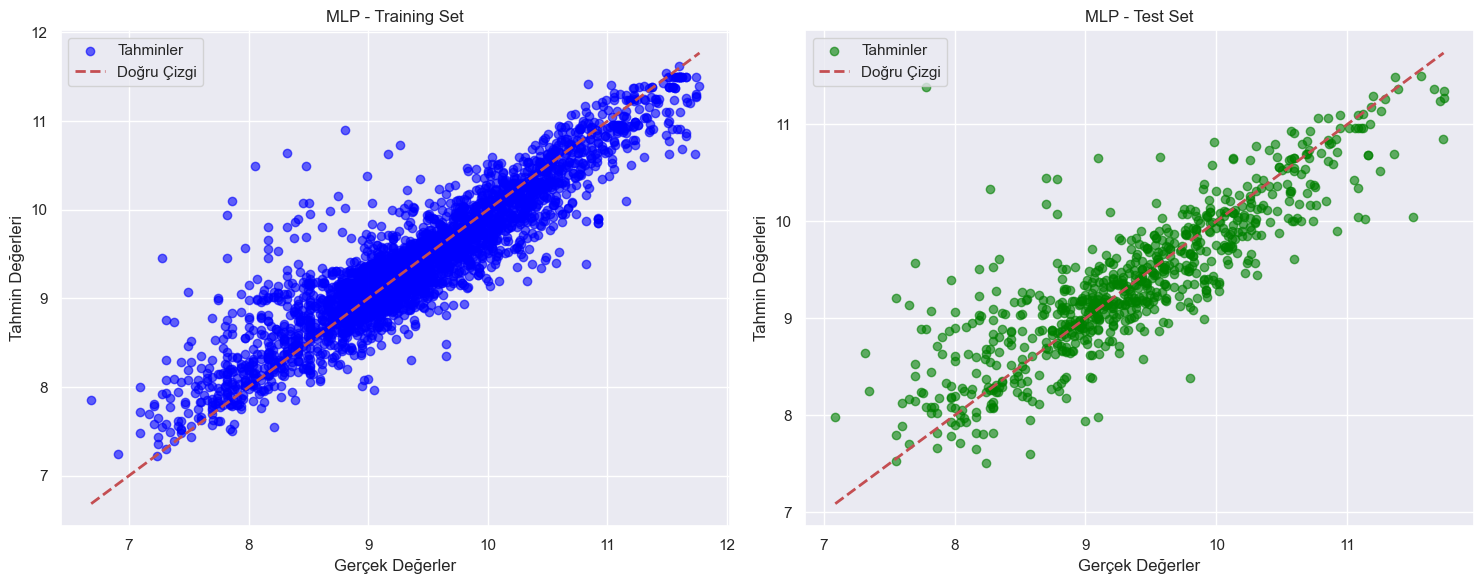

In [199]:
# MLP Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_linear, y_pred_train_mlp, alpha=0.6, color='blue', label='Tahminler')
plt.plot([y_train_linear.min(), y_train_linear.max()], [y_train_linear.min(), y_train_linear.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('MLP - Training Set')
plt.legend()

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_linear, y_pred_test_mlp, alpha=0.6, color='green', label='Tahminler')
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('MLP - Test Set')
plt.legend()

plt.tight_layout()
plt.show()

In [200]:
import joblib
joblib.dump(lr, r'models/mlp_model.pkl')
print('Model saved as mlp_model.pkl')

Model saved as mlp_model.pkl


### 5.12. Keras Deep Neural Network

In [201]:
# Keras Deep Neural Network
def create_dnn_model(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Model oluştur ve eğit
dnn_model = create_dnn_model(X_train_linear.shape[1])

history = dnn_model.fit(
    X_train_linear, y_train_linear,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

# Tahminler
y_pred_train_dnn = dnn_model.predict(X_train_linear, verbose=0).flatten()
y_pred_test_dnn = dnn_model.predict(X_test_linear, verbose=0).flatten()

# Performans metrikleri
rmse_train_dnn = np.sqrt(mean_squared_error(np.exp(y_train_linear), np.exp(y_pred_train_dnn)))
rmse_test_dnn = np.sqrt(mean_squared_error(np.exp(y_test_linear), np.exp(y_pred_test_dnn)))
r2_train_dnn = r2_score(y_train_linear, y_pred_train_dnn)
r2_test_dnn = r2_score(y_test_linear, y_pred_test_dnn)

print("\n📊 Deep Neural Network (Keras) Sonuçları:")
print(f"RMSE Train: {rmse_train_dnn:.2f}")
print(f"RMSE Test: {rmse_test_dnn:.2f}")
print(f"R² Train: {r2_train_dnn:.4f}")
print(f"R² Test: {r2_test_dnn:.4f}")





📊 Deep Neural Network (Keras) Sonuçları:
RMSE Train: 10382.18
RMSE Test: 10741.91
R² Train: 0.7721
R² Test: 0.6787


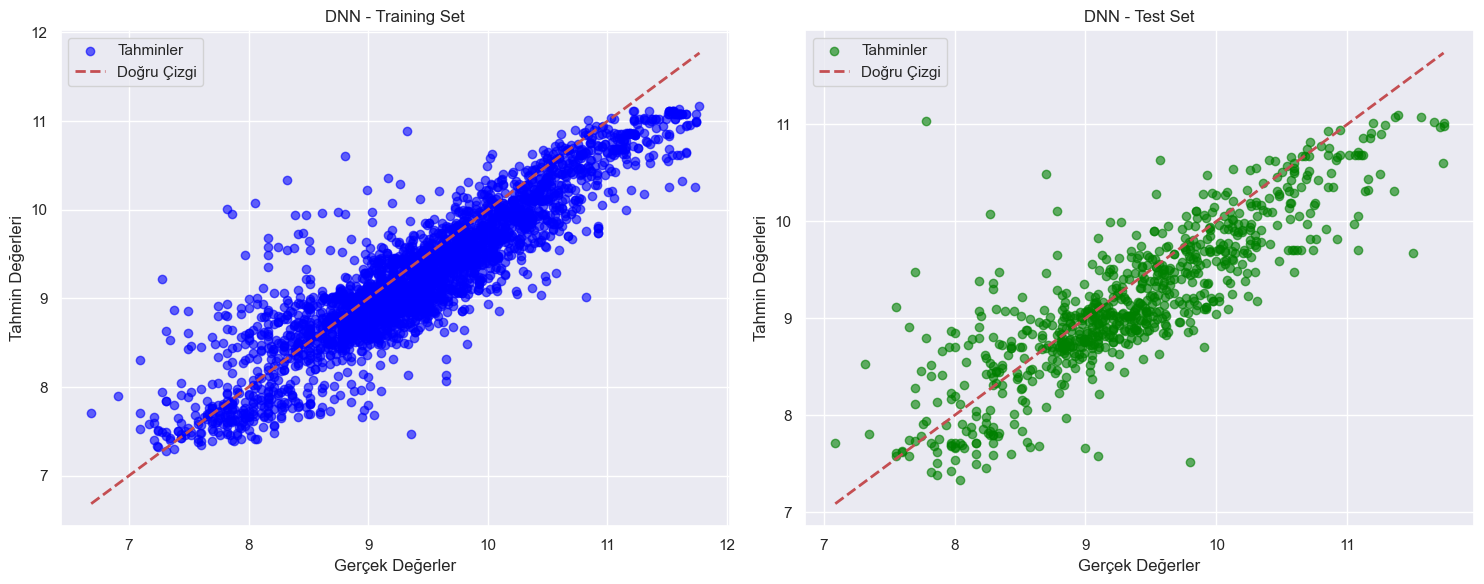

In [202]:
# DNN Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(15, 6))

# Eğitim seti için grafik
plt.subplot(1, 2, 1)
plt.scatter(y_train_linear, y_pred_train_dnn, alpha=0.6, color='blue', label='Tahminler')
plt.plot([y_train_linear.min(), y_train_linear.max()], [y_train_linear.min(), y_train_linear.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('DNN - Training Set')
plt.legend()

# Test seti için grafik
plt.subplot(1, 2, 2)
plt.scatter(y_test_linear, y_pred_test_dnn, alpha=0.6, color='green', label='Tahminler')
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'r--', lw=2, label='Doğru Çizgi')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('DNN - Test Set')
plt.legend()

plt.tight_layout()
plt.show()

In [203]:
import joblib
joblib.dump(lr, r'models/keras_model.pkl')
print('Model saved as keras_model.pkl')

Model saved as keras_model.pkl


## 6. Tüm modellerin karşılaştırması

In [204]:
# Tüm model sonuçlarını toplama
model_results = {
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM',
        'Gradient Boosting', 'Extra Trees', 'Ridge Regression', 'Lasso Regression',
        'Elastic Net', 'SVR', 'Neural Network (MLP)', 'Deep Neural Network',
        'Voting Regressor',
    ],
    'RMSE_Train': [
        10165, 630, rmse_train_xgb, rmse_train_lgb,
        rmse_train_gb, rmse_train_et, rmse_train_ridge, rmse_train_lasso,
        rmse_train_elastic, rmse_train_svr, rmse_train_mlp, rmse_train_dnn,
        rmse_train_voting,
    ],
    'RMSE_Test': [
        11692, 4177, rmse_test_xgb, rmse_test_lgb,
        rmse_test_gb, rmse_test_et, rmse_test_ridge, rmse_test_lasso,
        rmse_test_elastic, rmse_test_svr, rmse_test_mlp, rmse_test_dnn,
        rmse_test_voting
    ],
    'R2_Test': [
        0.85, 0.95, r2_test_xgb, r2_test_lgb,
        r2_test_gb, r2_test_et, r2_test_ridge, r2_test_lasso,
        r2_test_elastic, r2_test_svr, r2_test_mlp, r2_test_dnn,
        r2_test_voting
    ]
}

# DataFrame oluştur
results_df = pd.DataFrame(model_results)
results_df = results_df.round(2)

# Test RMSE'ye göre sırala
results_df = results_df.sort_values('RMSE_Test')

print("\n🏆 MODEL PERFORMANS SIRAMASI (Test RMSE'ye göre):")
print("=" * 80)
print(results_df.to_string(index=False))

# En iyi 3 model
print("\n🥇 EN İYİ 3 MODEL:")
print("=" * 30)
for i in range(3):
    model_name = results_df.iloc[i]['Model']
    rmse = results_df.iloc[i]['RMSE_Test']
    r2 = results_df.iloc[i]['R2_Test']
    print(f"{i+1}. {model_name}: RMSE={rmse:.2f}, R²={r2:.4f}")


🏆 MODEL PERFORMANS SIRAMASI (Test RMSE'ye göre):
               Model  RMSE_Train  RMSE_Test  R2_Test
         Extra Trees      630.17    4052.69     0.96
       Random Forest      630.00    4177.00     0.95
    Voting Regressor     1921.51    4333.87     0.95
             XGBoost     1309.15    4424.91     0.95
            LightGBM     3053.80    4645.16     0.94
   Gradient Boosting     4640.05    5659.59     0.92
                 SVR     6912.69    8989.86     0.70
Neural Network (MLP)     7745.08    9173.08     0.73
    Ridge Regression    10461.10   10115.93     0.73
 Deep Neural Network    10382.18   10741.91     0.68
   Linear Regression    10165.00   11692.00     0.85
         Elastic Net    13641.71   12560.74     0.67
    Lasso Regression    14939.50   13493.39     0.61

🥇 EN İYİ 3 MODEL:
1. Extra Trees: RMSE=4052.69, R²=0.9600
2. Random Forest: RMSE=4177.00, R²=0.9500
3. Voting Regressor: RMSE=4333.87, R²=0.9500


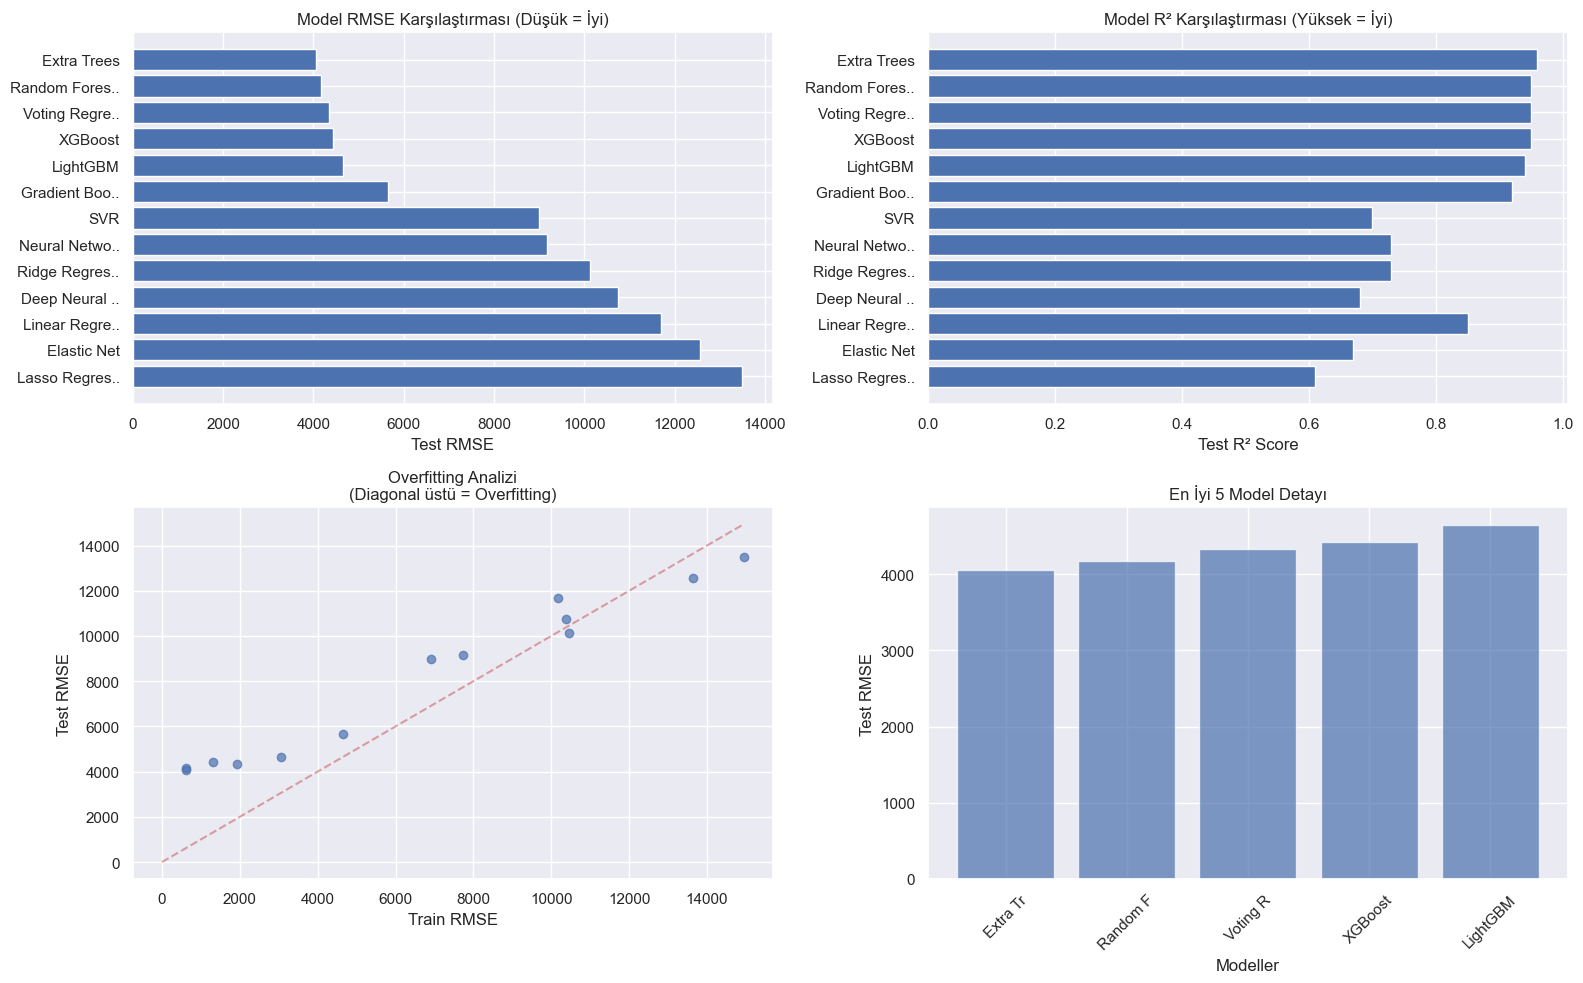

In [205]:
# Model performanslarını görselleştirme
plt.figure(figsize=(16, 10))

# RMSE karşılaştırması
plt.subplot(2, 2, 1)
models_short = [name[:12] + '..' if len(name) > 12 else name for name in results_df['Model']]
plt.barh(models_short, results_df['RMSE_Test'])
plt.xlabel('Test RMSE')
plt.title('Model RMSE Karşılaştırması (Düşük = İyi)')
plt.gca().invert_yaxis()

# R² karşılaştırması
plt.subplot(2, 2, 2)
plt.barh(models_short, results_df['R2_Test'])
plt.xlabel('Test R² Score')
plt.title('Model R² Karşılaştırması (Yüksek = İyi)')
plt.gca().invert_yaxis()

# Overfitting analizi (Train vs Test RMSE)
plt.subplot(2, 2, 3)
plt.scatter(results_df['RMSE_Train'], results_df['RMSE_Test'], alpha=0.7)
plt.plot([0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         [0, max(results_df['RMSE_Train'].max(), results_df['RMSE_Test'].max())], 
         'r--', alpha=0.5)
plt.xlabel('Train RMSE')
plt.ylabel('Test RMSE')
plt.title('Overfitting Analizi\n(Diagonal üstü = Overfitting)')

# En iyi 5 modelin detayı
plt.subplot(2, 2, 4)
top_5 = results_df.head(5)
x_pos = range(len(top_5))
plt.bar(x_pos, top_5['RMSE_Test'], alpha=0.7)
plt.xlabel('Modeller')
plt.ylabel('Test RMSE')
plt.title('En İyi 5 Model Detayı')
plt.xticks(x_pos, [name[:8] for name in top_5['Model']], rotation=45)

plt.tight_layout()
plt.show()